## National Data Management Center
- Data Analytics, Modeling and Visualization 


## 1. Problem Solving Section
### Preprocessing and EDA
In this section various activities are perforemd such as cleaning, transforming, and prepare data for analysis while gaining insights into its structure, relationships, and patterns through visualizations and statistical summaries.

##### Importing the relevant libraries
Below are all the requiered pacakges for the analysis and modeling 

In [2]:
#we will need the following libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#### A. Loading the data

In [3]:
# reading dataset
champ_df = pd.read_csv("../data/CHAMPS.csv")

In [4]:
# first 2 records
champ_df.head(2)

packet_version_id id_ver_nmb  champs_id  dp_001  dp_002  dp_003 dp_004  \
0   ETAA00002_01_01      2.0.0  ETAA00002       5       1       2      3   
1   ETAA00004_01_02      2.0.0  ETAA00004       5       1       2      3   

   dp_005  dp_006  dp_007  ...  dpf_012___ch00040  dpf_012___ch00041  \
0     4.0     5.0     6.0  ...                  0                  0   
1     4.0     5.0     6.0  ...                  0                  0   

   dpf_012___ch00042  dpf_012___ch00043 dpf_012___ch01424 dpf_012___ch01875  \
0                  0                  0                 0                 0   
1                  0                  0                 0                 0   

  dpf_012___ch00010                                            dpf_013  \
0                 0                          Tseyon Tesfaye Clinical     
1                 0  Adugna (SBS team), Tigistu (counselor), Tseyon...   

  dpf_014 crf_060302_decode_panel_feedback_form_complete  
0    None                                              2  
1     NaN                                              2  

[2 rows x 381 columns]

In [5]:
# shape of the dataset
champ_df.shape

(444, 381)

In [6]:
# based on the decoding table, which I used in this entaire project 
df_deco= champ_df[[ 'champs_id', 'dp_013', 'dp_108', 'dp_118']]

In [7]:
# reading first five row 
df_deco.head()

champs_id   dp_013                                   dp_108  \
0  ETAA00002  CH00716                             Undetermined   
1  ETAA00004  CH00716                             Undetermined   
2  ETAA00005  CH00716                     Intrauterine hypoxia   
3  ETAA00008  CH00719  Severe acute malnutrition - Kwashiorkor   
4  ETAA00009  CH01406                                   Sepsis   

                                              dp_118  
0                                       Undetermined  
1                                       Undetermined  
2  Fetus and newborn affected by other forms of p...  
3                                                NaN  
4                                                NaN

In [8]:
# shape of the dataset (rpws and column)
df_deco.shape

(444, 4)

In [9]:
# we can use info
df_deco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   champs_id  444 non-null    object
 1   dp_013     444 non-null    object
 2   dp_108     444 non-null    object
 3   dp_118     197 non-null    object
dtypes: object(4)
memory usage: 14.0+ KB


In [10]:
#description 
df_deco.describe()

champs_id   dp_013                dp_108        dp_118
count         444      444                   444           197
unique        444        6                    97            97
top     ETAA00002  CH00716  Intrauterine hypoxia  Preeclampsia
freq            1      239                   148            36

In [11]:
# identifying nulls in each columns/fields
df_deco.isnull().sum()

champs_id      0
dp_013         0
dp_108         0
dp_118       247
dtype: int64

### C. Enumerate the columns of the dataset

In [12]:
# enumerat columns
for index, column in enumerate(df_deco.columns):
    print(f"Column {index}: {column}")

Column 0: champs_id
Column 1: dp_013
Column 2: dp_108
Column 3: dp_118


In [13]:
# or simply we can use
df_deco.columns 

Index(['champs_id', 'dp_013', 'dp_108', 'dp_118'], dtype='object')

### D. Rename columns
- columns are renamed here according to the direction for better undersanding 

In [14]:
# converting to list 
old_columns = df_deco.columns.tolist()

In [15]:
new_columns = ['CHAMPS_ID', 'Case Type', 'Underlying Cause', 'Maternal Factor']

In [16]:
# now Mapping using dict and zip functions
column_mapp = dict(zip(old_columns, new_columns))


In [17]:
# renaming columns accordingly 
df_deco.rename(columns=column_mapp, inplace=True)

In [18]:
# verifying column renaming
df_deco.columns

Index(['CHAMPS_ID', 'Case Type', 'Underlying Cause', 'Maternal Factor'], dtype='object')

### Updating values 
- in this section some of the coded values are updated, particularly the value of `Case Type`.

In [19]:
# exploring the values of case type
df_deco['Case Type'].value_counts()

CH00716    239
CH01404     69
CH01405     49
CH00719     42
CH00718     27
CH01406     18
Name: Case Type, dtype: int64

In [20]:
# Updating the values 
df_deco['Case Type'].replace({'CH00716': 'Stillbirth', 'CH01404': 'Death in the first 24 hours', 
                        'CH01405' : 'Early Neonate (1 to 6 days)', 'CH00719' : 'Child (12 months to less than 60 months)', 
                        'CH00718':'Infant (28 days to less than 12 months)', 
                        'CH01406' :'Late Neonate (7 to 27 days)',  }, inplace=True)


In [21]:
# verifying
df_deco.sample(2)

CHAMPS_ID   Case Type       Underlying Cause  \
399  ETAA01154  Stillbirth   Intrauterine hypoxia   
334  ETAA01007  Stillbirth  Intrauterine hypoxia    

                                       Maternal Factor  
399                                                NaN  
334  Fetus and newborn affected by other malpresent...

### Null propertion in each column
- Null values in each column are identified 
> arround 55 % of the values in the `Maternal Factor` column are null

In [22]:
# Calculate proportion of null values in each column using isnull and mean
null_proportion = df_deco.isnull().mean()

print(null_proportion)

CHAMPS_ID           0.000000
Case Type           0.000000
Underlying Cause    0.000000
Maternal Factor     0.556306
dtype: float64


## 2. Descriptive Data analysis
- Based on the given decoded table and the dictionary, descriptive data analysis are on the datasets 

### A. What are the magnitude and proportion of each of the infant underlying cause for child death?


#### Identify driving factor for child death:
> Here the column is ` Underlying Cause` used to find magnitude and proportion of each of the infant.

In [23]:
# Calculate magnitude (count of each underlying cause)
cause_counts = df_deco['Underlying Cause'].value_counts()
# Calculate total number of deaths
total_deaths = cause_counts.sum()
# Calculate proportion (percentage of each cause of death)
cause_proportions = (cause_counts / total_deaths) * 100
# Combine magnitude and proportion into a DataFrame
cause_summary = pd.DataFrame({
    'Magnitude': cause_counts,
    'Proportion (%)': cause_proportions
})
print(cause_summary)


                                                  Magnitude  Proportion (%)
Intrauterine hypoxia                                    148       33.333333
Birth asphyxia                                           33        7.432432
Undetermined                                             28        6.306306
Severe acute malnutrition                                24        5.405405
Craniorachischisis                                       16        3.603604
...                                                     ...             ...
Severe acute malnutrition-Kwashiorkor                     1        0.225225
severe acute malnutrition, Marasmic Kwashiorkor           1        0.225225
Severe acute malnutrition - Marasmic kwashiorkor          1        0.225225
Congenital CMV infection                                  1        0.225225
Bacterial sepsis of the newborn                           1        0.225225

[97 rows x 2 columns]


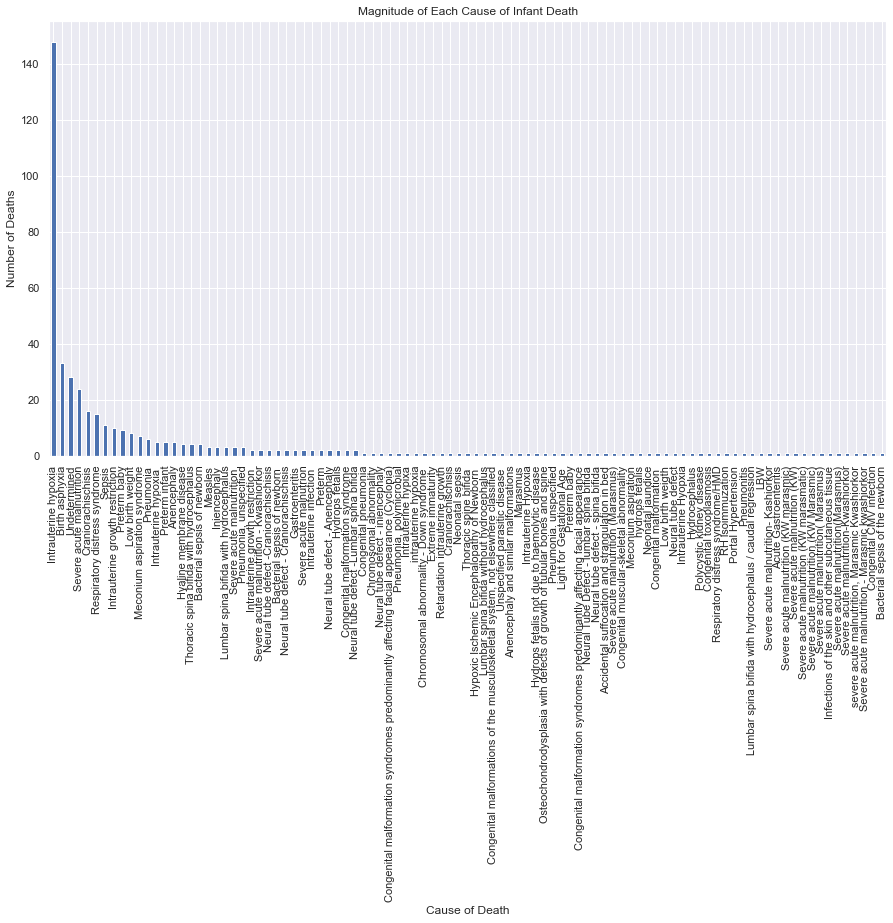

In [24]:
# Visualize data 
# Bar plot for magnitude of each cause
plt.figure(figsize=(15, 8))
cause_counts.plot(kind='bar')
plt.title('Magnitude of Each Cause of Infant Death', fontsize =20, color='blue' )
plt.xlabel('Cause of Death')
plt.ylabel('Number of Deaths')
plt.show()

*****Insight from the above | underlying cause*****
- the above descriptive summary and the bar graph shows clear and precise information. accordingly here is few summary given below to make it simplify.
> - `Intrauterine hypoxia`, is the most and far highest underlying cause for infant death and it covers 33% of the total deaths.
> - `Birth asphyxia` is the second most underlying cause the for the infant death and it covers 7% of the total deaths.
> - 6% of the infant death is `Undetermined` their underlying cuses which is ranked thirdly accordingto the given dataset.
> - Next, `Severe acute malnutrition` is the cause for the infant death which is 5%. 
- In summary considering the magnitude and proportion of the underlying cause, there should be a special attention to reduce the infant death caused by `Intrauterine hypoxia`.

### B. What are the proportion and magnitude of the maternal factors contributing for child death?


#### Identify driving factor to for child death:
> Here the column is ` Maternal Factor` used to find magnitude and proportion of each of the infant death.


In [25]:
#child death with maternal factor contribution 
maternal_factors_data = df_deco[df_deco['Maternal Factor'].notnull()]
# Calculate magnitude (count of each maternal factor)
maternal_factor_counts = maternal_factors_data['Maternal Factor'].value_counts()

# Calculate total number of deaths influenced by maternal factors
total_maternal_deaths = maternal_factor_counts.sum()

# Calculate proportion (percentage of each maternal factor)
maternal_factor_proportions = (maternal_factor_counts / total_maternal_deaths) * 100

# Combine magnitude and proportion into a DataFrame
maternal_factor_summary = pd.DataFrame({
    'Magnitude': maternal_factor_counts,
    'Proportion (%)': maternal_factor_proportions
})

print(maternal_factor_summary)


                                                    Magnitude  Proportion (%)
Preeclampsia                                               36       18.274112
Twin pregnancy                                             12        6.091371
Fetus and newborn affected by other forms of pl...         11        5.583756
Eclampsia                                                   9        4.568528
Fetus and newborn affected by other forms of pl...          5        2.538071
...                                                       ...             ...
Fetus and newborn affected by oligohydramnios               1        0.507614
Fetus and newborn affected by maternal diabetes             1        0.507614
Fetus and newborn affected by maternal infectio...          1        0.507614
Fetus and newborn affected by multiple pregnanc...          1        0.507614
Pre-labor rapture of membrane                               1        0.507614

[97 rows x 2 columns]


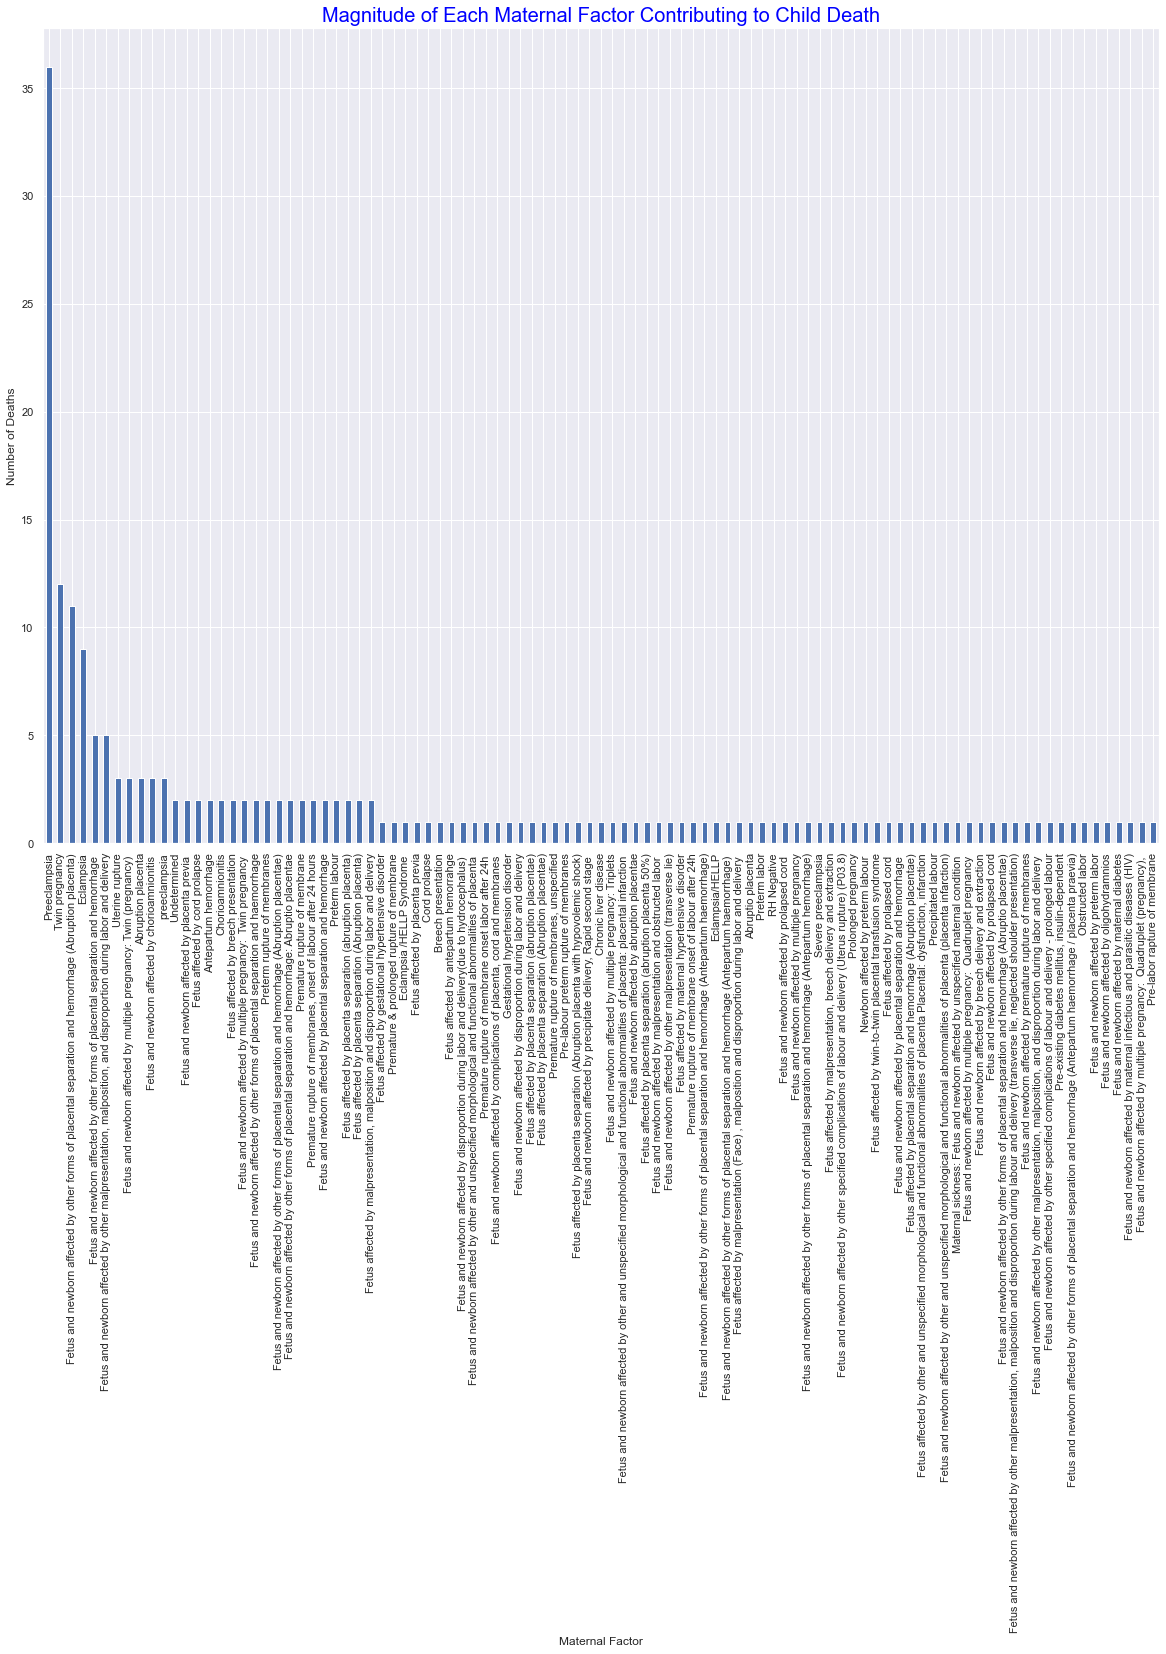

In [26]:
# Bar plot for magnitude of each maternal factor
plt.figure(figsize=(20, 15))
maternal_factor_counts.plot(kind='bar')
plt.title('Magnitude of Each Maternal Factor Contributing to Child Death', fontsize =20, color='blue')
plt.xlabel('Maternal Factor')
plt.ylabel('Number of Deaths')
plt.show()

*****Insight from the above | Maternal Factor*****
- The above descriptive summary and the bar graph shows clear and precise information about the contribution of Maternal Factor to infant death . Accordingly here is few summary given below to make it understandable.
> - `Preeclampsia`, is the most and far highest maternal factor for infant death and it covers 18% of the total deaths contribution.
> - `Twin pregnancy` is the second most maternal factor the for the infant death and it covers 6% of the total deaths.
> - `Fetus and newborn affected by other forms` contributes 5% of the infant death which is ranked thirdly accordingto the given dataset.
> - Next, `Eclampsia` is the maternal factor for the infant death which contributes around 4%. 
- In summary considering the magnitude and proportion of the Maternal Factor contribution to infant death, it requiers a spect special attention to reduce the infant death contributed by `Preeclampsia`.

### C.What are the proportion of the child death by the case type

#### Identify Column:

> Here the column `Case Type` is used to explore the proportion and magnitude of child death.

In [27]:
# Calculate the count of each case type
case_type_counts = df_deco['Case Type'].value_counts()
# Calculate total number of deaths
total_deaths = case_type_counts.sum()
# Calculate proportion (percentage) of each case type
case_type_proportions = (case_type_counts / total_deaths) * 100
# Combine count and proportion into a DataFrame
case_type_summary = pd.DataFrame({
    'Magnitude': case_type_counts,
    'Proportion (%)': case_type_proportions
})

print(case_type_summary)


                                          Magnitude  Proportion (%)
Stillbirth                                      239       53.828829
Death in the first 24 hours                      69       15.540541
Early Neonate (1 to 6 days)                      49       11.036036
Child (12 months to less than 60 months)         42        9.459459
Infant (28 days to less than 12 months)          27        6.081081
Late Neonate (7 to 27 days)                      18        4.054054


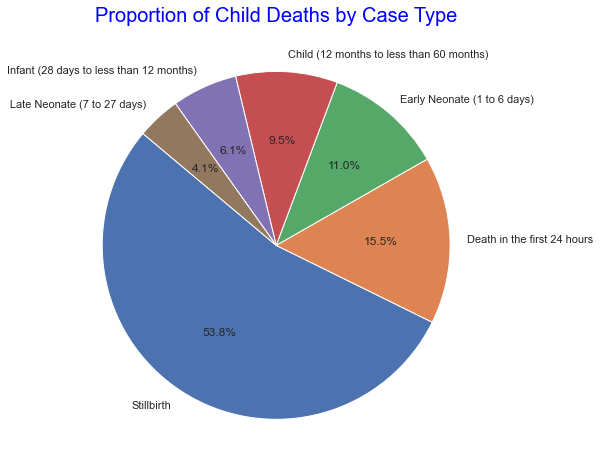

In [28]:
# Visualization 
# Pie chart for the proportion of each case type
plt.figure(figsize=(12, 8))
case_type_proportions.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Child Deaths by Case Type', fontsize =20, color='blue')
plt.ylabel('')
plt.show()


*****Insight from the above | Case Type*****
- The above descriptive summary and the pie chart shows clear and precise information about the case type in relation to infant death . Accordingly, here is few summary given below to make it ease.
> - `Stillbirth`, is the first most highest case type in infant death and it accounts 53% of the total deaths cases.
> - `Death in the first 24 hours` is the second most case type in the infant death and it accounts 15% of the total deaths cases.
> - `Early Neonate (1 to 6 days)` accounts 11% in the infant death which is ranked thirdly accordingto the given dataset.
> - Next, `Child (12 months to less than 60 months)` accounts 9% in the infant death. 
- In summary considering the magnitude and proportion of the case type in relation to infant death, it requiers a specila research and study to mitigate the problem behind the case type `Stillbirth`.

## 3.	Correlation analysis 
Using correlation or Heat Maps, show how each of the infant underlying conditions and maternal factors are correlated to the top three causes of the child death identified above under 2(A)

In [29]:
# filter top three underlying cause of death
top_3_causes = df_deco['Underlying Cause'].value_counts().head(3).index.tolist()
# filtering deta based on the top three causes
filtered_data = df_deco[df_deco['Underlying Cause'].isin(top_3_causes)]

In [30]:
top_3_causes

['Intrauterine hypoxia', 'Birth asphyxia', 'Undetermined']

#### Prepare Data for Correlation Analysis:
> - First Create dummy variables for categorical columns.
> - Choose appropriet encoding technique, like `one-hot` encoding.
> - Apply correlation matrix

In [31]:
# data encoding and correlation matric
data_encoded = pd.get_dummies(filtered_data, columns=['Underlying Cause', 'Maternal Factor'])
#print(data_encoded.head(1))
# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()
print(correlation_matrix)
# Extract the correlation for top causes of death
top_causes_correlation = correlation_matrix.loc[:, correlation_matrix.columns.str.contains('|'.join(top_3_causes))]

# Display the correlation matrix
print(top_causes_correlation)


                                       Underlying Cause_Birth asphyxia  \
Underlying Cause_Birth asphyxia                               1.000000   
Underlying Cause_Intrauterine hypoxia                        -0.674476   
Underlying Cause_Undetermined                                -0.170310   
Maternal Factor_Abruptio placenta                             0.160128   
Maternal Factor_Abruption placenta                            0.058061   
...                                                                ...   
Maternal Factor_Severe preeclampsia                          -0.030024   
Maternal Factor_Twin pregnancy                               -0.052255   
Maternal Factor_Undetermined                                 -0.042563   
Maternal Factor_Uterine rupture                               0.092219   
Maternal Factor_preeclampsia                                 -0.030024   

                                       Underlying Cause_Intrauterine hypoxia  \
Underlying Cause_Birth asphyxia

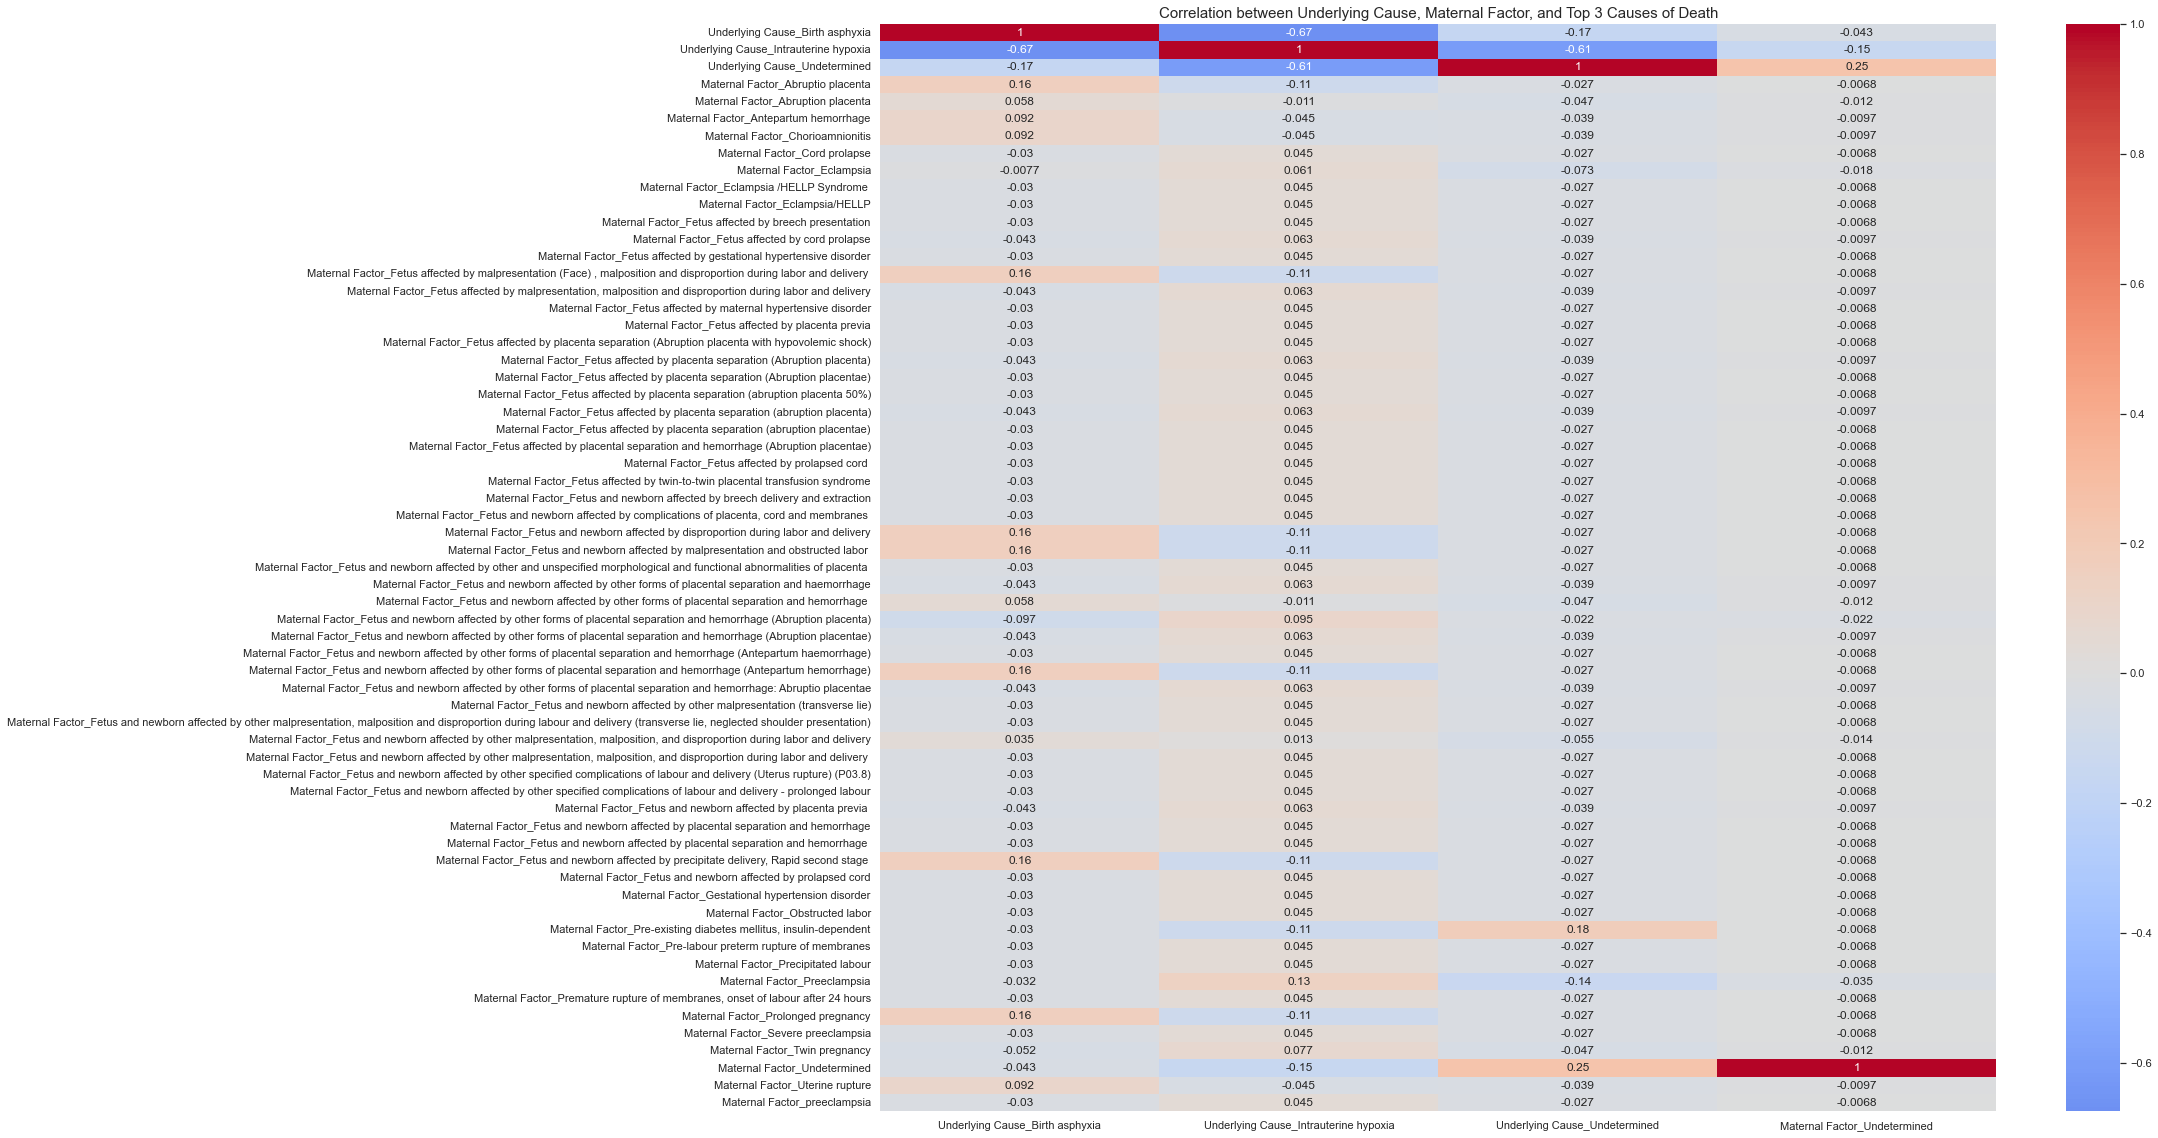

In [32]:
# using heat map
# Create a heat map for the correlation matrix
plt.figure(figsize=(25, 20))
sns.heatmap(top_causes_correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Underlying Cause, Maternal Factor, and Top 3 Causes of Death', size =15)
plt.show()


*****Insight from the above | correlation Analysis*****
- Correlation analysis has made on infant underlying conditions and maternal factors how they are correlated to the top three causes of the child death.
- In most case the correlation result shows negative realtion among the variables. Some positive relation few with no realtions are observed. here are few illustrations:
    > - Maternal Factor_Abruptio placenta  \ Underlying Cause_Birth asphyxia  `0.160128`
    > - Maternal Factor_Antepartum hemorrhage  \Underlying Cause_Birth asphyxia `0.092219`
    > - Maternal Factor_Prolonged pregnancy  \ Underlying Cause_Birth asphyxia  `0.160128`   

## 4.Feature engineering  
You are expected to select the top infant underlying causes and maternal factors(features) that would contribute to the top three causes of child death identified under 2(A) above. For this, you need to select the best and likely features. In doing so:
- A. Select the classification models LogisticRegression, Support Vector Machine, AdaBoostClassifier,  Random Forest Classifier ,  Gradient Boosting Classifier  and XGBOOST and train  each on the dataset
- B. Import the appropriate package for each of the classification models above
- C. Rank the features based on their importance for each of the top underlying causes of child death identified above under 2(A), for each of the classification algorithms under (A )

#### Step 1
- encoding and spliting data as target and feature

In [33]:
# Encoding 
# One-hot encode categorical columns for 'Case Type' and 'Maternal Factor'
data_encoded = pd.get_dummies(filtered_data, columns=['Maternal Factor'])

# Set the target variable
y = data_encoded['Underlying Cause']

# Encode the target variable as integer labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Set the feature variables, excluding 'Case Type','CHAMPS_ID' and 'Underlying Cause'
X = data_encoded.drop(columns=['Case Type','Underlying Cause', 'CHAMPS_ID'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Step 2: Train Classification Models
- Identifying classifiers
- Train each classifier and collect feature importances

In [36]:
# classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(kernel='linear', probability=True),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train each classifier and collect feature importances
feature_importances = {}

for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    if hasattr(clf, 'coef_'):
        importances = clf.coef_[0]
        print(importances)
    elif hasattr(clf, 'feature_importances_'):
        importances = clf.feature_importances_
    feature_importances[name] = importances


[ 0.29264313  0.20315778 -0.09172598  0.20315778 -0.09172598  0.19656664
 -0.09172598 -0.09172598  0.         -0.12947367  0.          0.
 -0.12947367  0.         -0.09172598 -0.09172598 -0.09172598 -0.09172598
 -0.09172598 -0.12947367 -0.09172598 -0.09172598  0.         -0.09172598
 -0.09172598 -0.09172598  0.29264313  0.         -0.09172598  0.
  0.20315778 -0.33920149 -0.12947367 -0.09172598  0.29264313 -0.09172598
 -0.09172598 -0.09172598 -0.12947367 -0.09172598 -0.09172598  0.
 -0.12947367  0.          0.          0.29264313 -0.09172598 -0.09172598
  0.         -0.09430552 -0.09172598 -0.09172598  0.28805891 -0.09172598
  0.29264313 -0.09172598 -0.12947367 -0.13310848  0.20315778  0.        ]
[ 1.64953350e-01  8.88178420e-16 -2.22044605e-16 -8.88178420e-16
 -2.22044605e-16 -8.88178420e-16 -2.22044605e-16 -2.22044605e-16
  0.00000000e+00  4.44089210e-16  0.00000000e+00  0.00000000e+00
  4.44089210e-16  0.00000000e+00 -2.22044605e-16  2.22044605e-16
 -2.22044605e-16 -2.22044605e-16 

#### Step 3: Rank Features Based on Importance
- Ranking features 

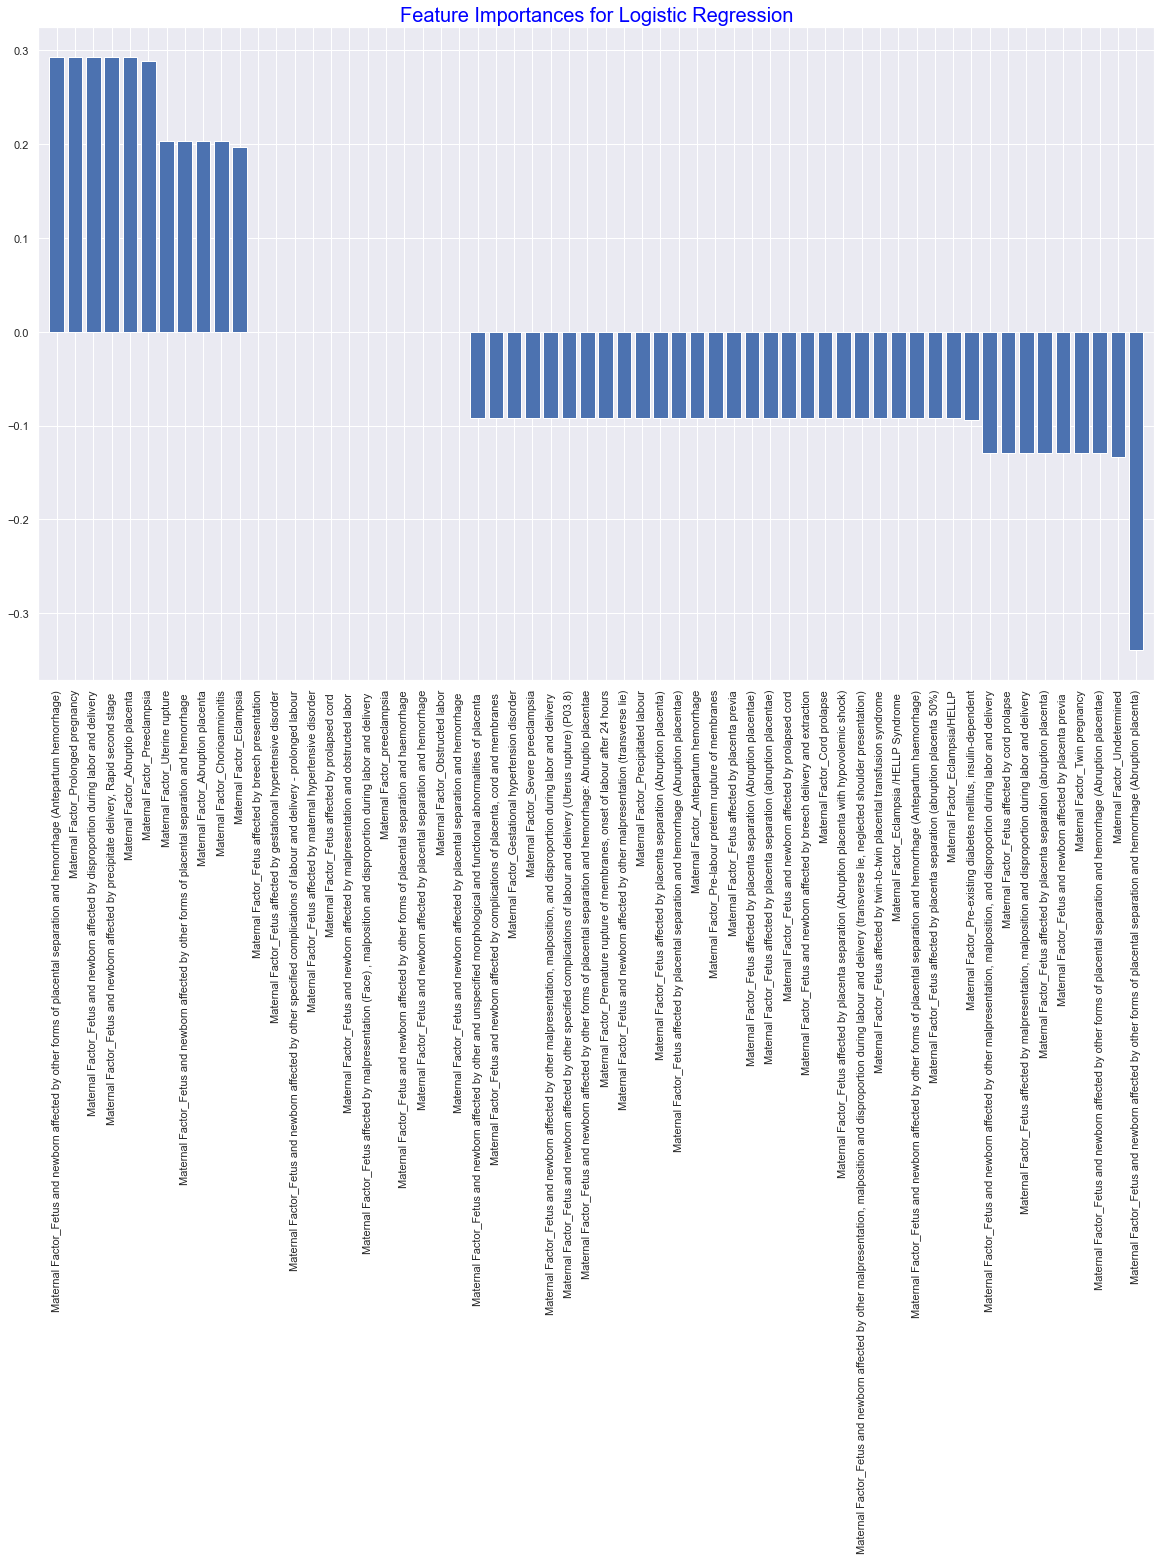

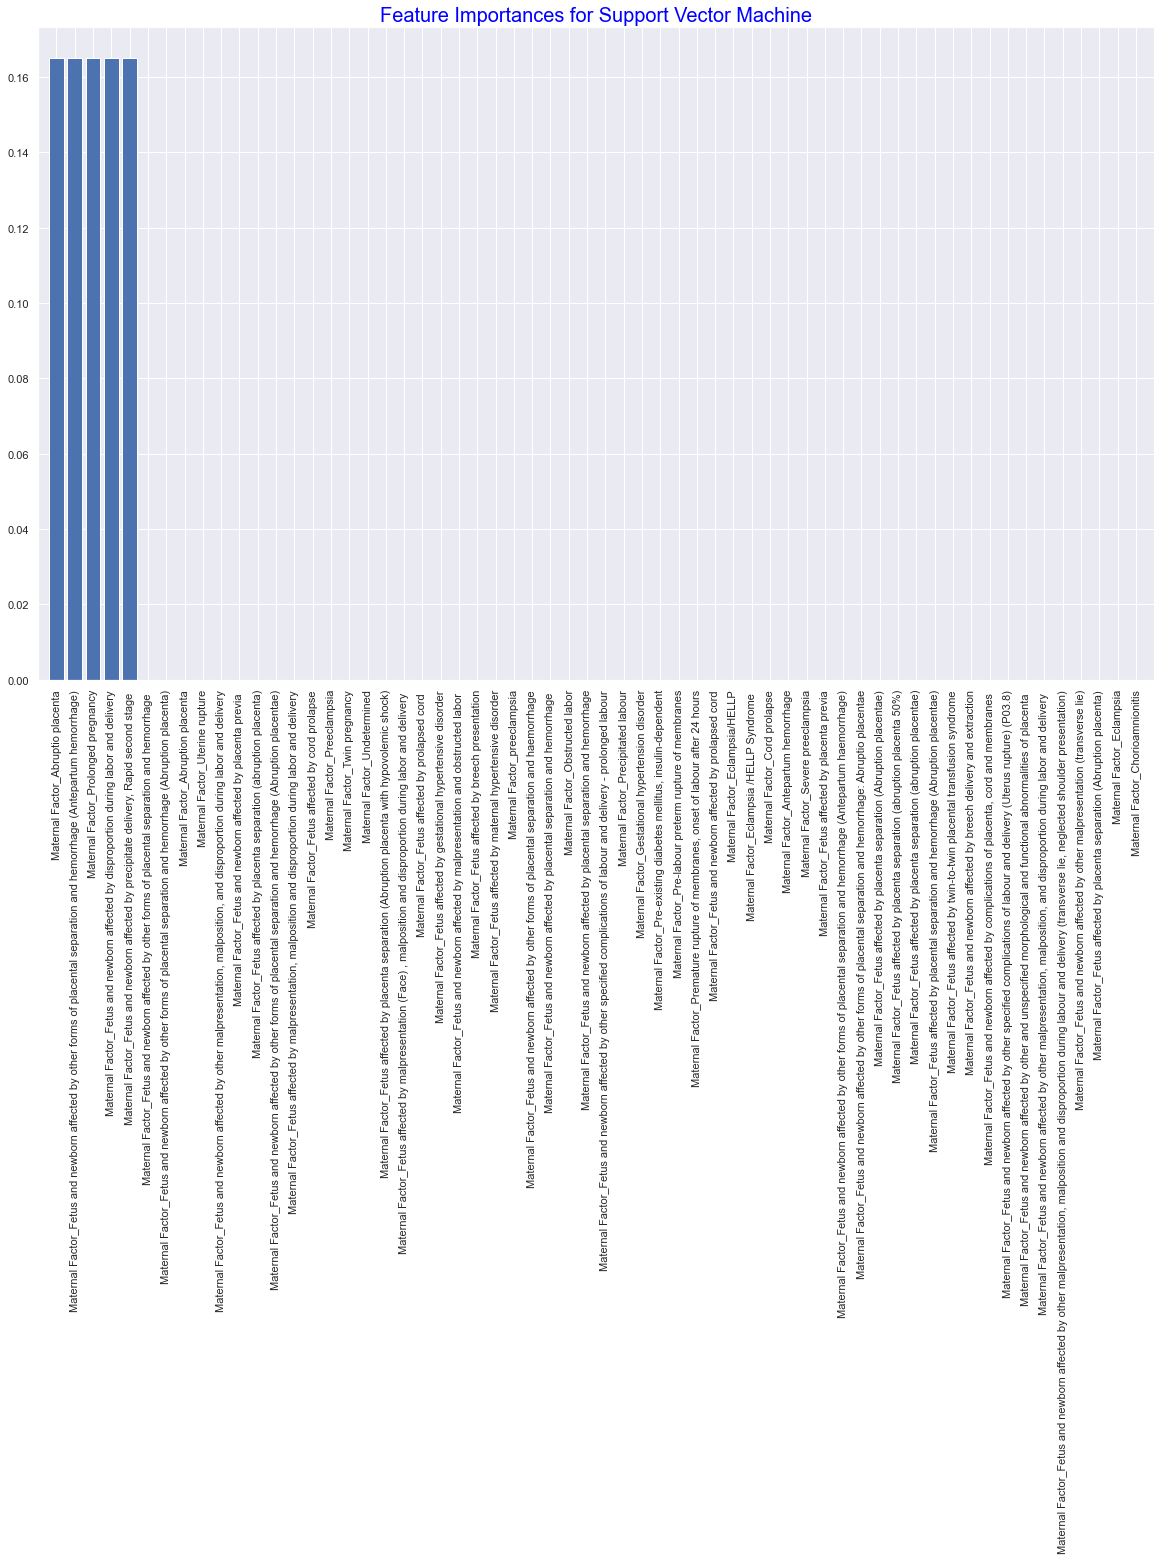

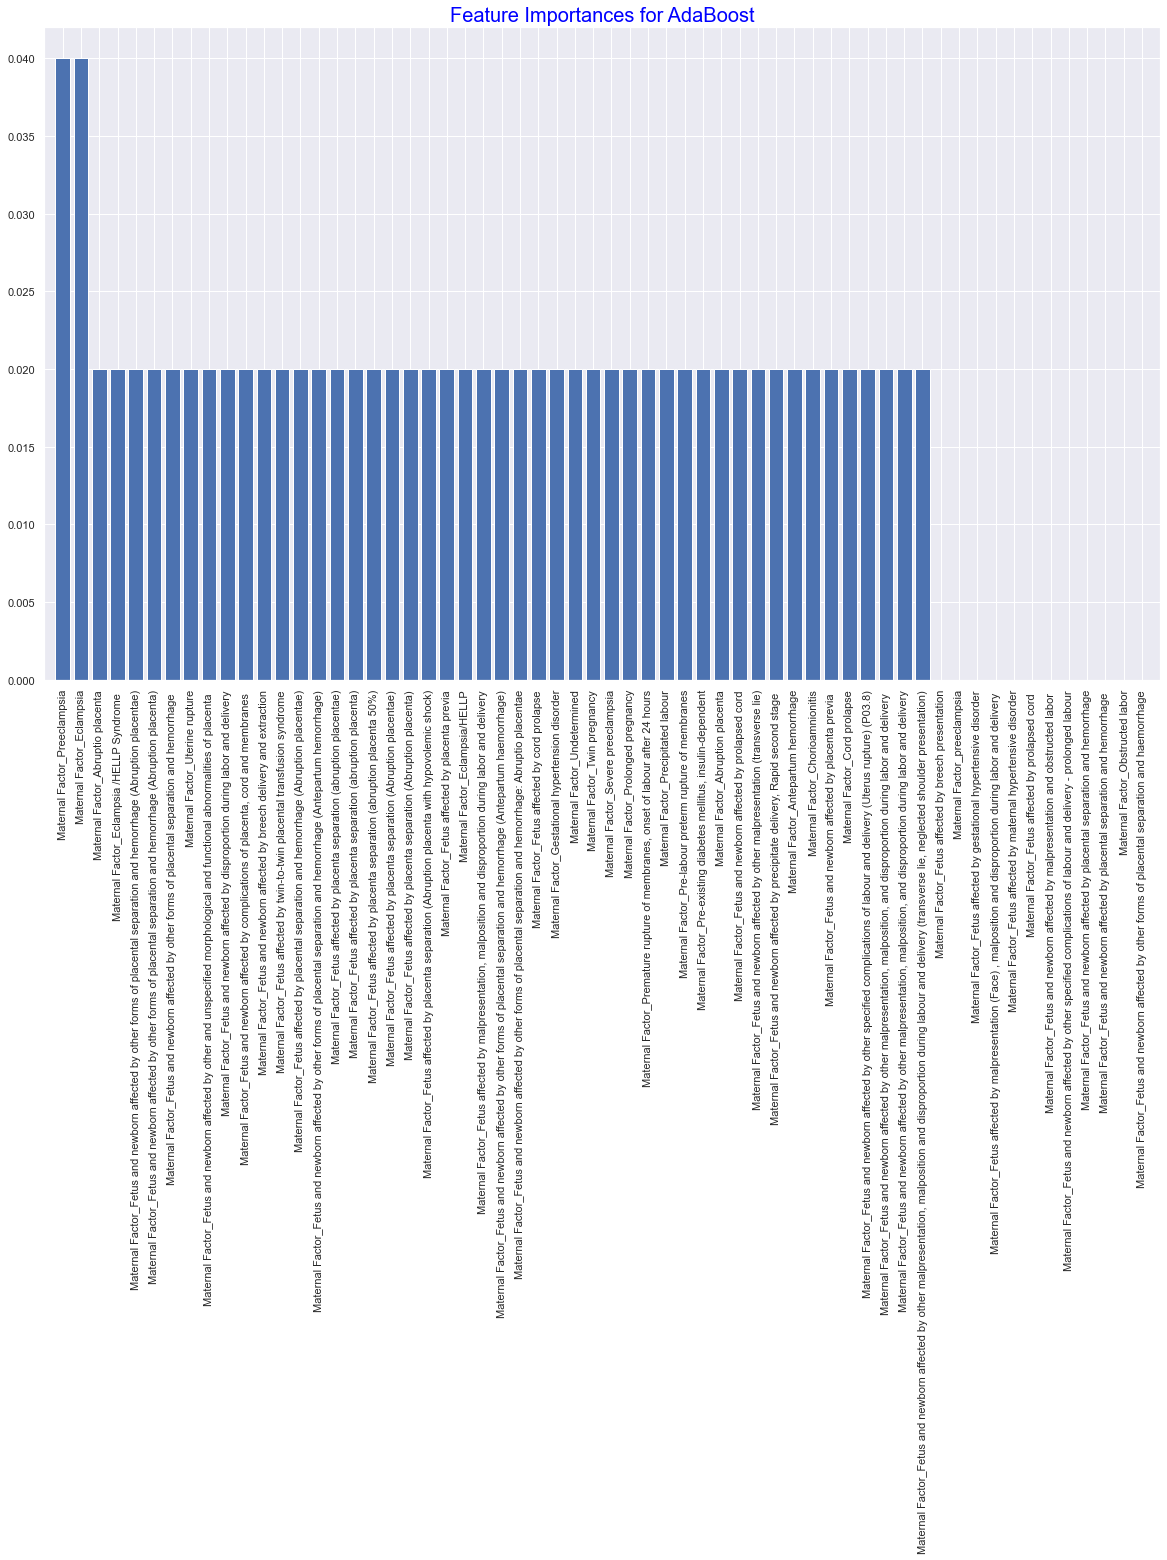

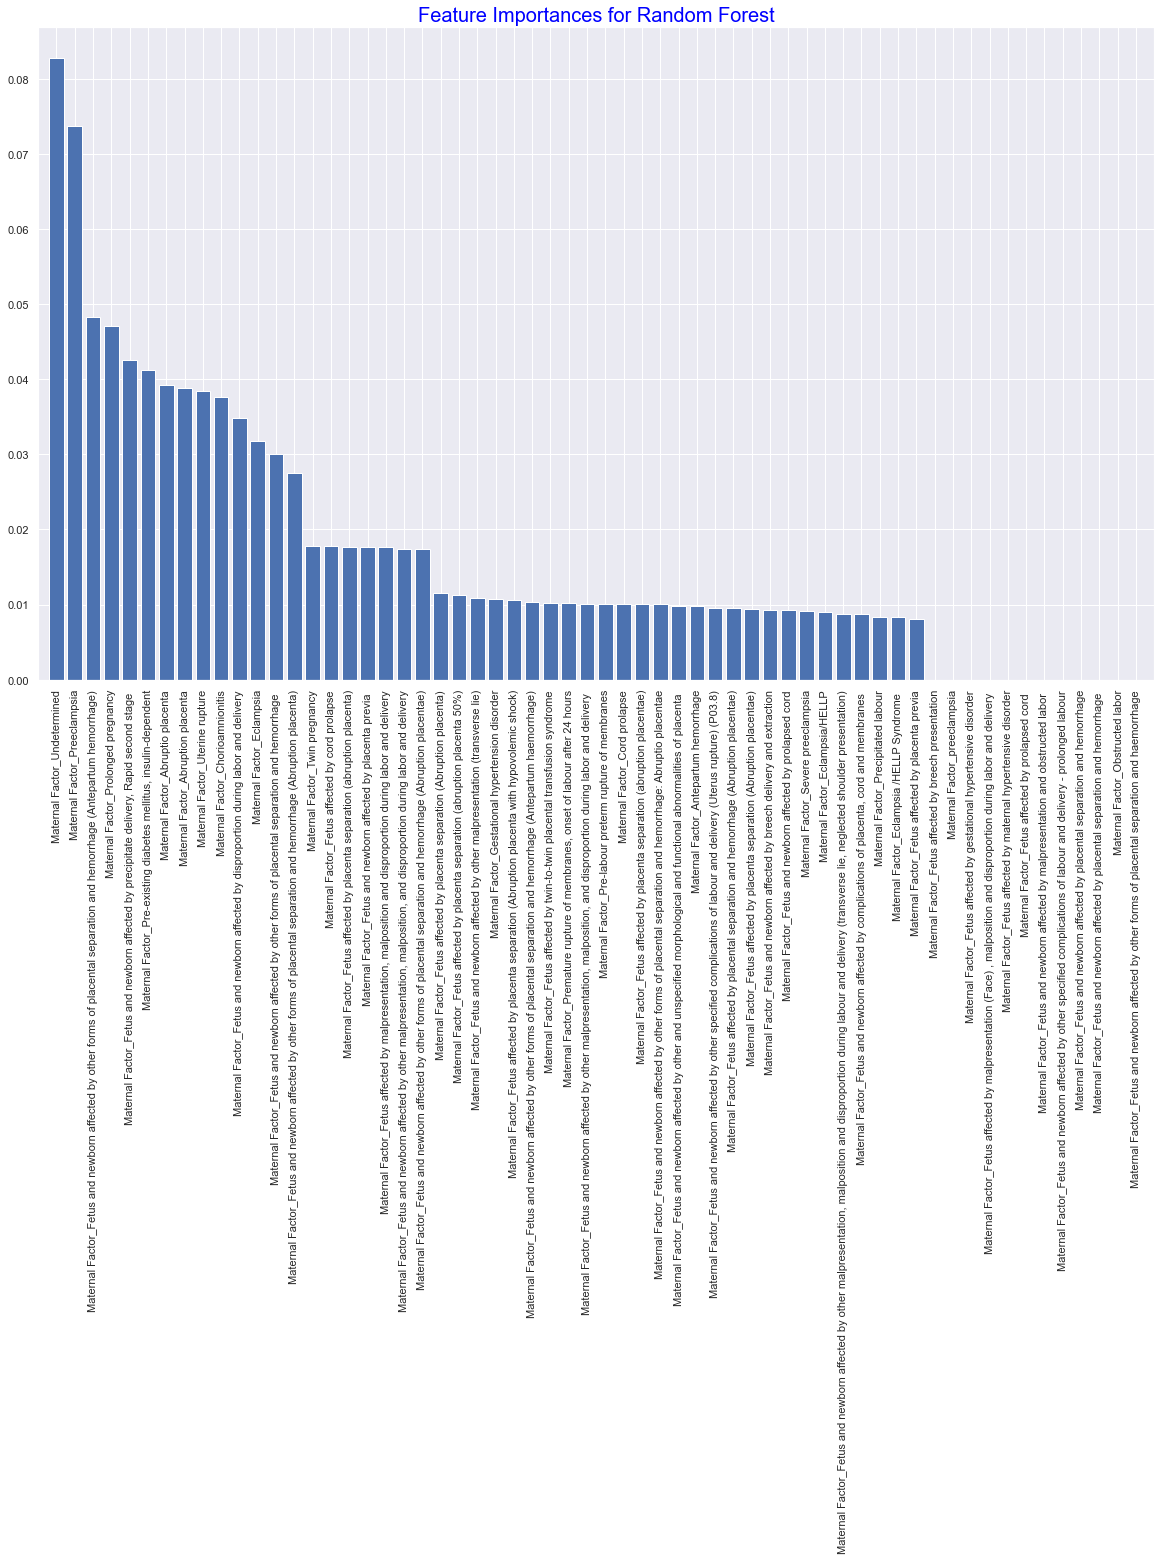

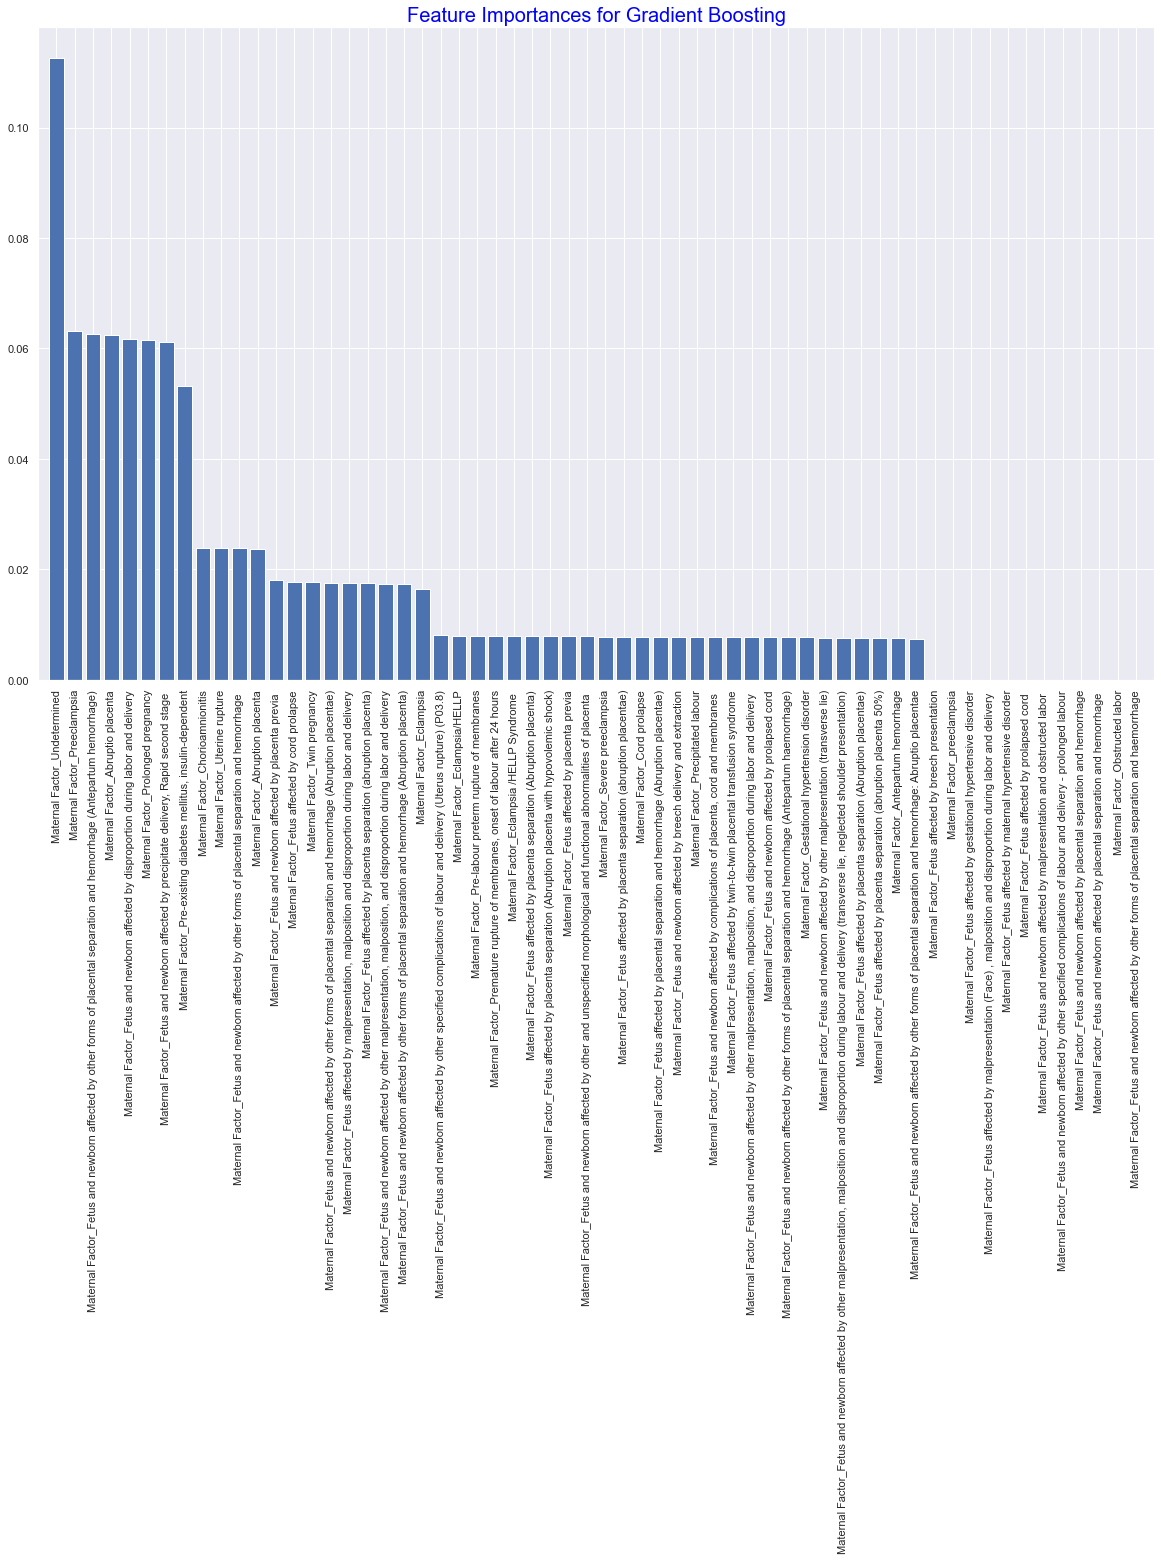

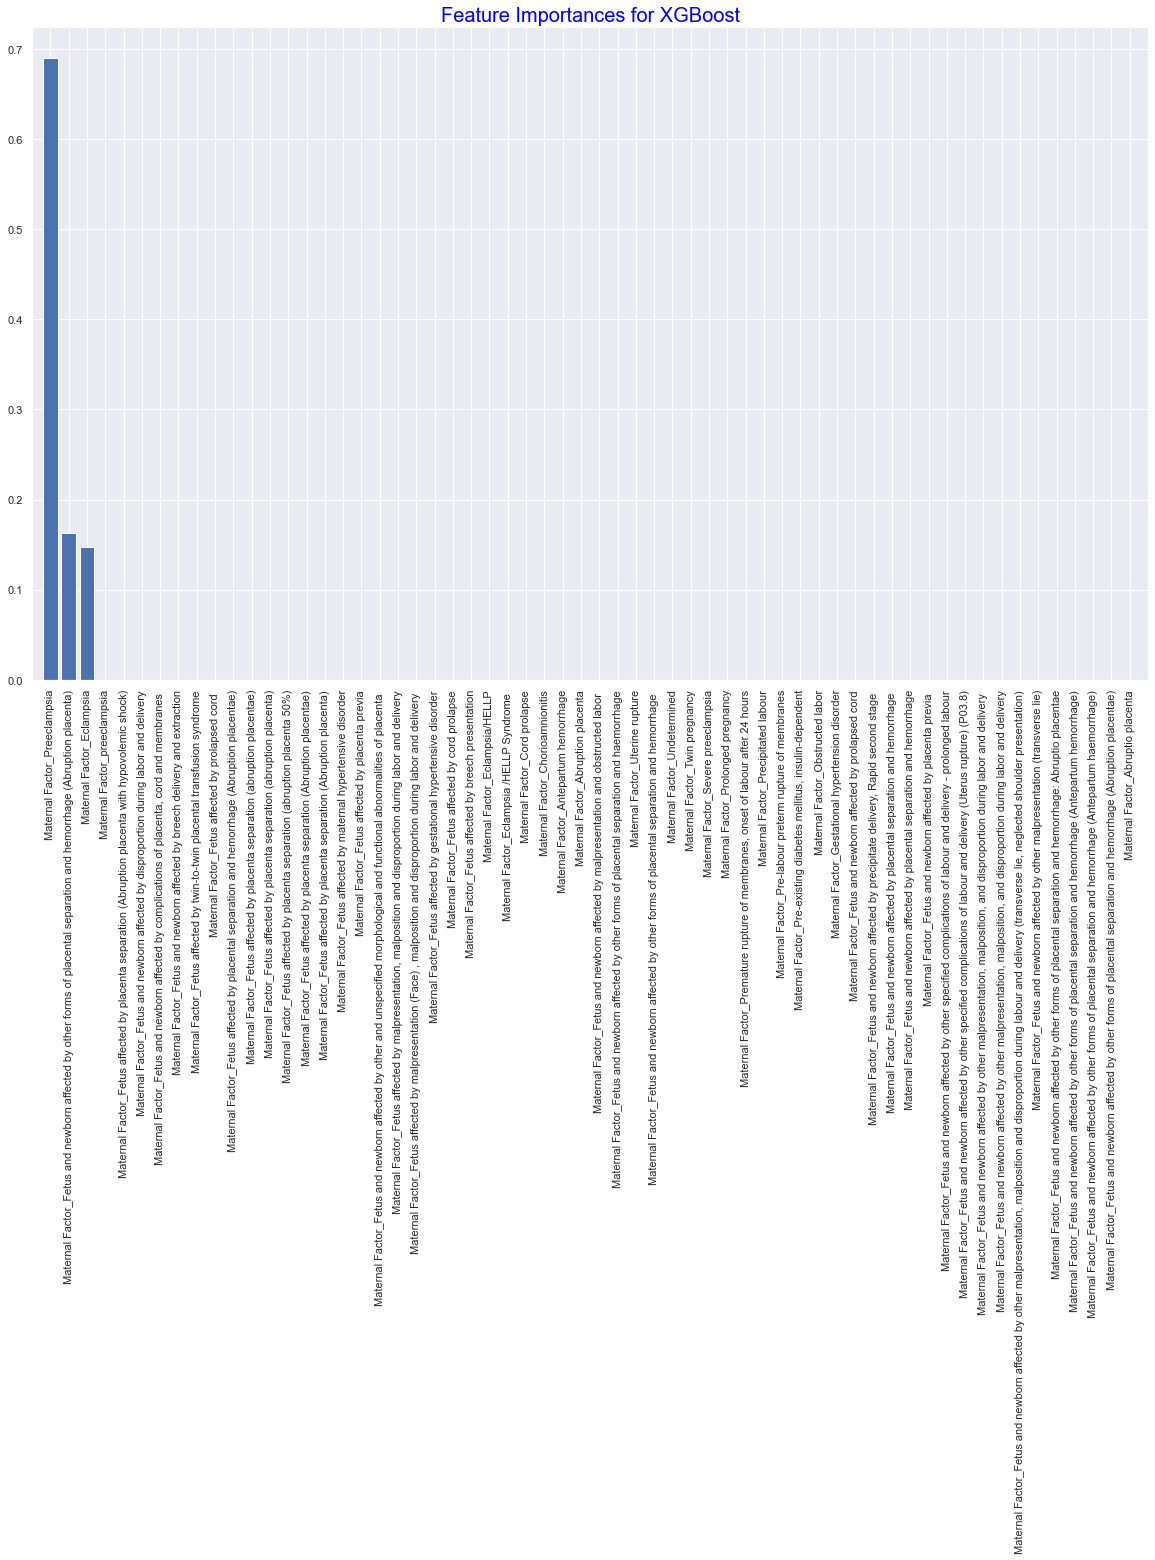

In [62]:
# Get feature names
feature_names = X.columns

# Plot feature importances for each classifier
for name, importances in feature_importances.items():
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(20, 12))
    plt.title(f'Feature Importances for {name}', fontsize =20, color='blue' )
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.tight_layout()
    plt.show()

****Insight from the above | Feature engineering****
- Feature engineering and feature importance has been made accordingly and ranked as well. So, the feature importance (3) for each classifier is ranked as follows in decreasing order:
    > - Logistic Regression 
    >  - Maternal Factor_Fetus and newborn affected    
    >  - Maternal Factor_Prolonged pregnancy   
    >  - Maternal Factor_Abruptio placenta   
    > - Support Vector Machine
    >  - Maternal Factor_Abruptio placenta 
    >  - Maternal Factor_Fetus and newborn affected 
    >  - Maternal Factor_Prolonged pregnancy 
    > - AdaBoost 
    >  - Maternal Factor_Eclampsia       
    >  - Maternal Factor_Preeclampsia       
    >  - Maternal Factor_Abruptio placenta 
    > - Random Forest
    >  - Maternal Factor_Undetermined 
    >  - Maternal Factor_Preeclampsia
    >  - Maternal Factor_Fetus and newborn affected 
    > - Gradient Boosting
    >  - Maternal Factor_Undetermined  
    >  - Maternal Factor_Preeclampsia   
    >  - Maternal Factor_Prolonged pregnancy 
    >- XGBoost    
    >  - Maternal Factor_Preeclampsia
    >  - Maternal Factor_Fetus and newborn affected
    >  - Maternal Factor_Eclampsia   
    - to summarize, there are features which a zero and negative importance levels as it is shown in the above graph

## 5. Model evaluation using the proper metrics
- A.	Import the appropriate evaluation metric packages
- B.	Using the appropriate n-fold cross validation and out of sample data, select the best preforming model from the candidate models under 4(A)
- C.	Ensemble the models and see the performance  of the  combination models on the data
- D.	Use Accuracy score metrics to evaluate the performance of the models above 
- E.	Plot the AUC and ROC curve on the same graph to visualize and compare the performance of each of the models above


In [63]:
# Set up n-fold cross-validation
n_folds = 4
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
#Evaluate Each Model Using Cross-Validation:

cv_results = {}

for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=skf, scoring='accuracy')
    cv_results[name] = cv_scores
    print(f"{name}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Select the best performing model based on mean cross-validation score
best_model_name = max(cv_results, key=lambda k: cv_results[k].mean())
best_model = classifiers[best_model_name]
print(f"Best Model: {best_model_name}")


Logistic Regression: 0.6575 ± 0.0307
Support Vector Machine: 0.6575 ± 0.0307
AdaBoost: 0.6575 ± 0.0307
Random Forest: 0.6575 ± 0.0307
Gradient Boosting: 0.6575 ± 0.0307
XGBoost: 0.6644 ± 0.0098
Best Model: XGBoost


In [64]:
#### creating essemble model 
ensemble_model = VotingClassifier(estimators=[
    ('lr', classifiers['Logistic Regression']),
    ('svm', classifiers['Support Vector Machine']),
    ('adb', classifiers['AdaBoost']),
    ('rf', classifiers['Random Forest']),
    ('gb', classifiers['Gradient Boosting']),
    ('xgb', classifiers['XGBoost'])
], voting='soft')


In [65]:
## trining the essemble model
ensemble_model.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('svm', SVC(kernel='linear', probability=True)),
                             ('adb', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False,
                                            e...
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
          

In [66]:
# Evaluate the Ensemble Model:
ensemble_accuracy = accuracy_score(y_test, ensemble_model.predict(X_test_scaled))
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")


Ensemble Model Accuracy: 0.8095


- Ensemble model accuracy is far better (81%) than the individual classifiers (highest XGBoost 66%) because it leverages the best featurs of each classifer and it is recommended to apply it.

#### Accuracy Score Metrics to Evaluate the Performance of the Models

In [67]:
test_accuracies = {}

for name, clf in classifiers.items():
    y_pred = clf.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_accuracies[name] = test_accuracy
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")

# Ensemble model accuracy
y_pred_ensemble = ensemble_model.predict(X_test_scaled)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Test Accuracy: {ensemble_accuracy:.4f}")


Logistic Regression Test Accuracy: 0.8095
Support Vector Machine Test Accuracy: 0.8095
AdaBoost Test Accuracy: 0.7778
Random Forest Test Accuracy: 0.8095
Gradient Boosting Test Accuracy: 0.8095
XGBoost Test Accuracy: 0.8095
Ensemble Model Test Accuracy: 0.8095


- As we can see in the above result almost all the calssifier models score 81% accuracy score except AdaBOost (78%).

#### Plot the AUC and ROC Curve to Visualize and Compare Performance

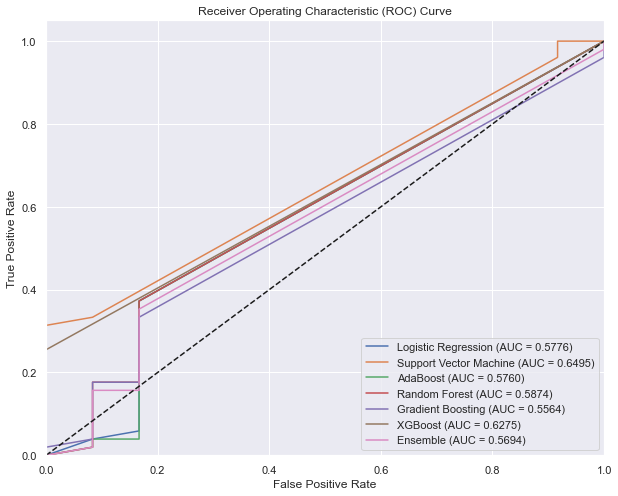

In [68]:
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    y_proba = clf.predict_proba(X_test_scaled)
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")

# Ensemble model ROC curve
y_proba_ensemble = ensemble_model.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_proba_ensemble[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"Ensemble (AUC = {roc_auc:.4f})")

# Plotting
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## 6. Result Visualization

#### A. Plot the feature importance in descending order for each of the models using horizontal bar chart

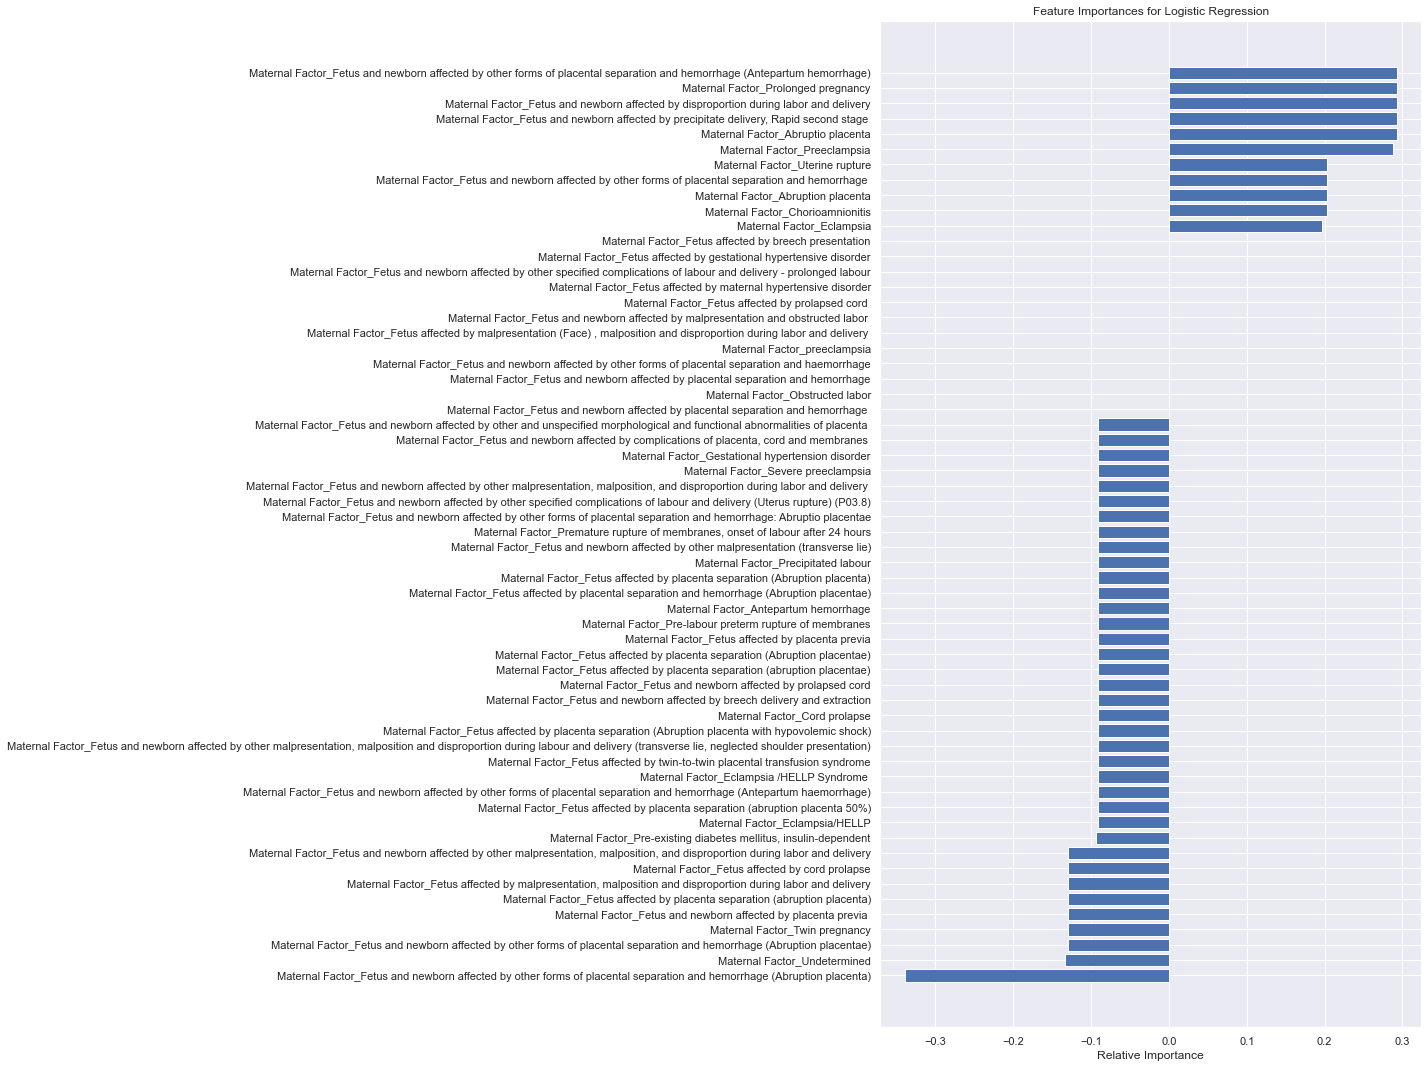

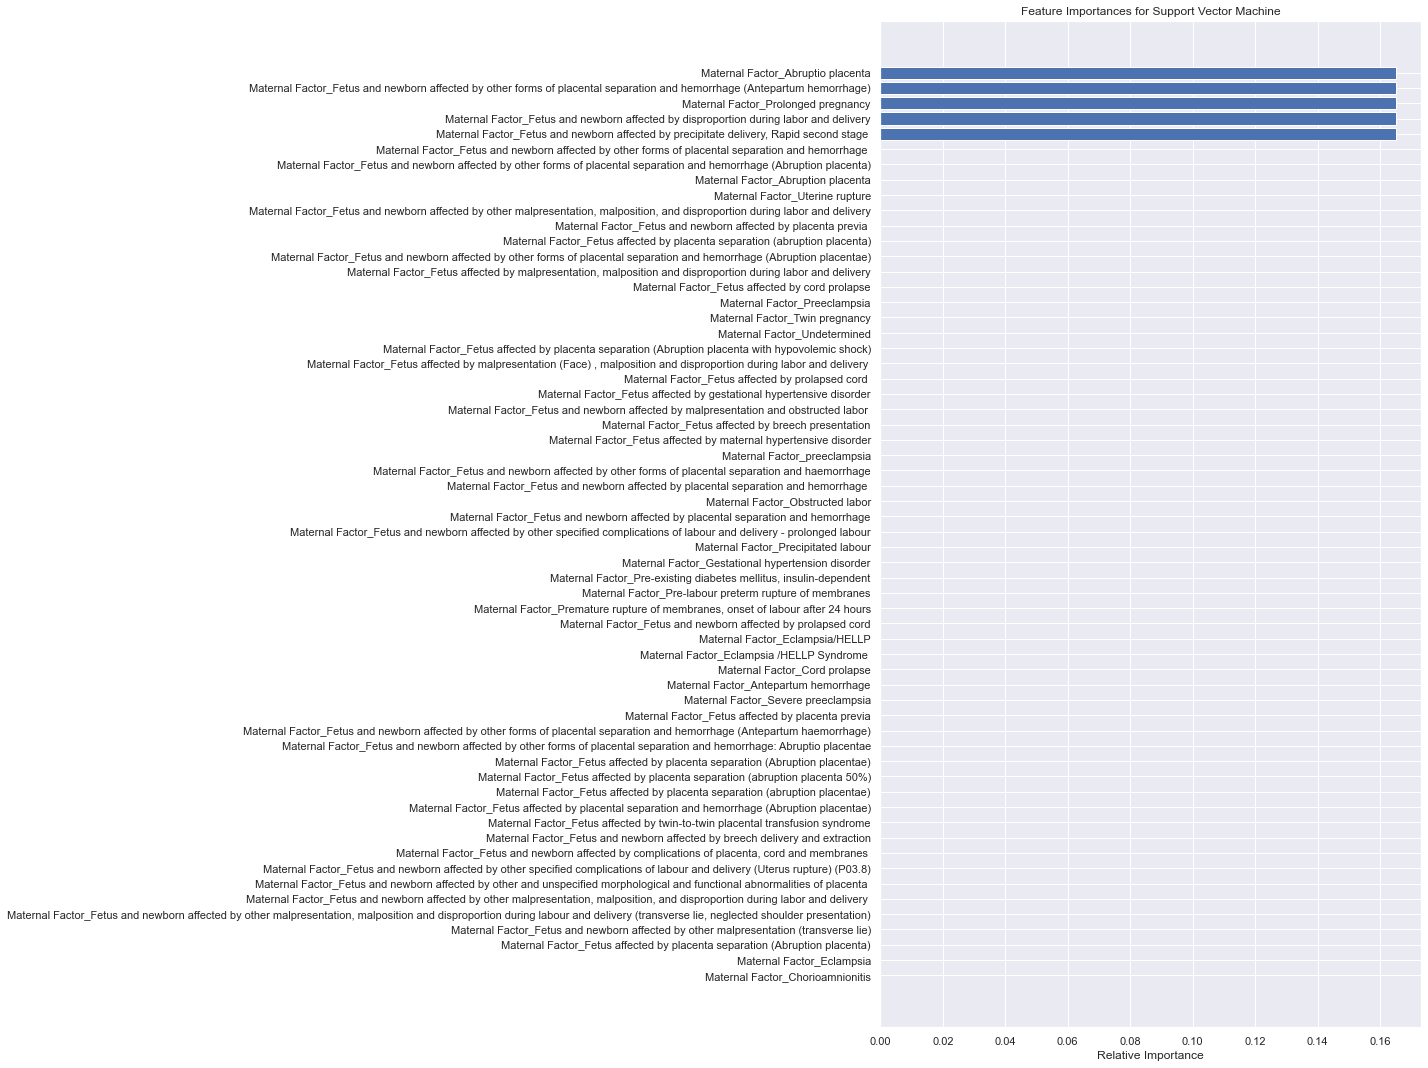

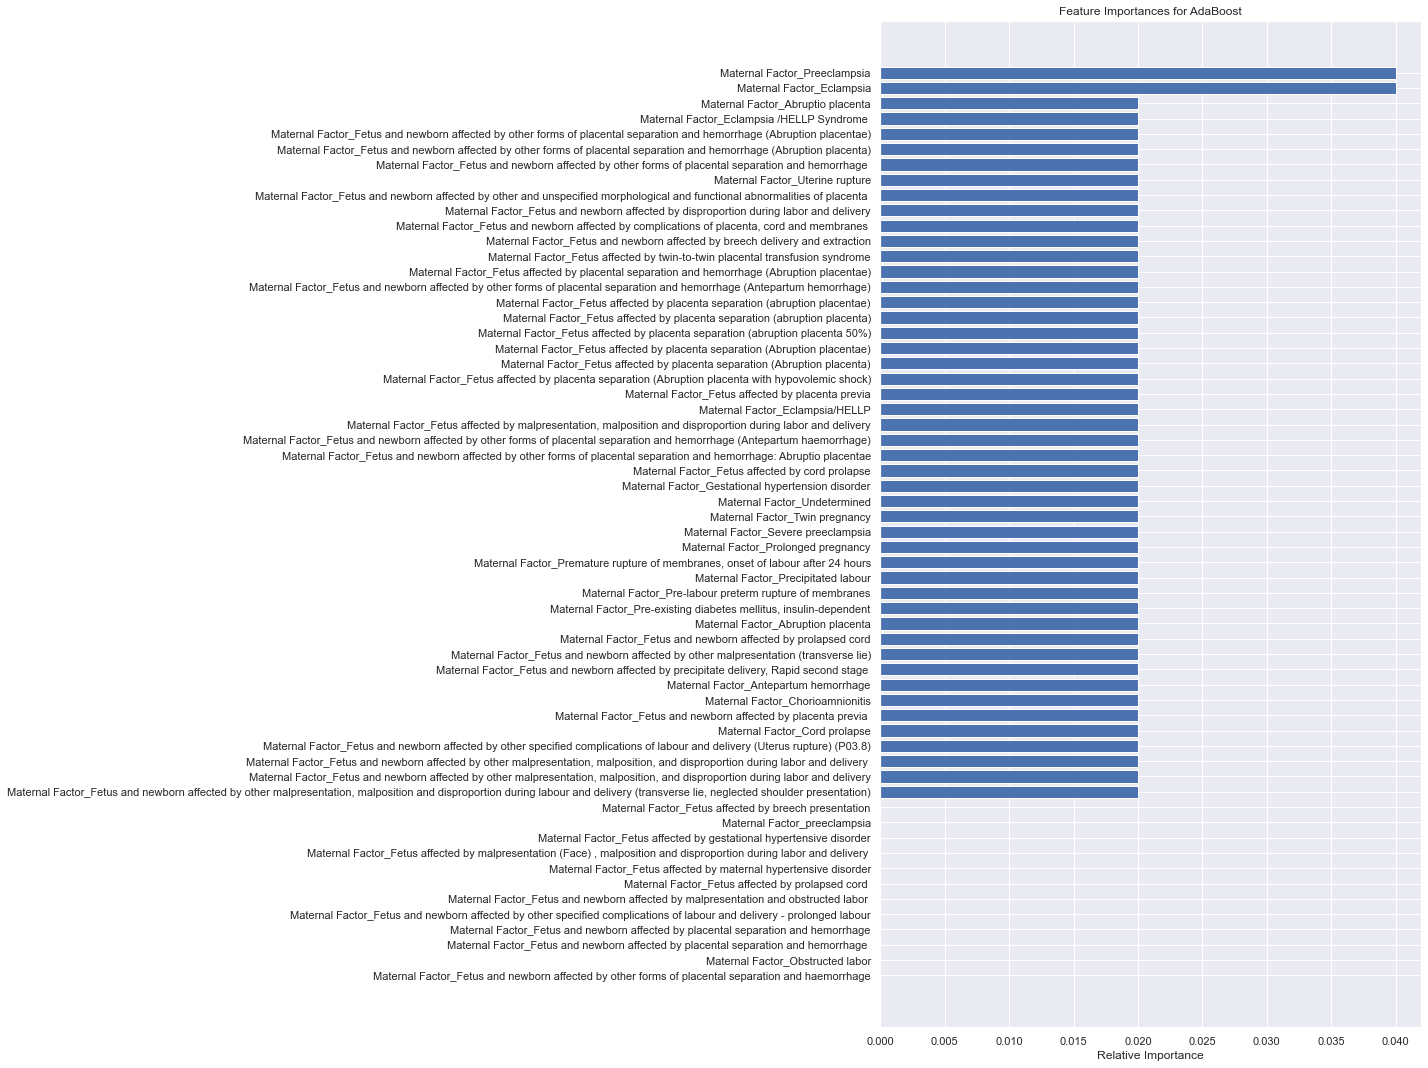

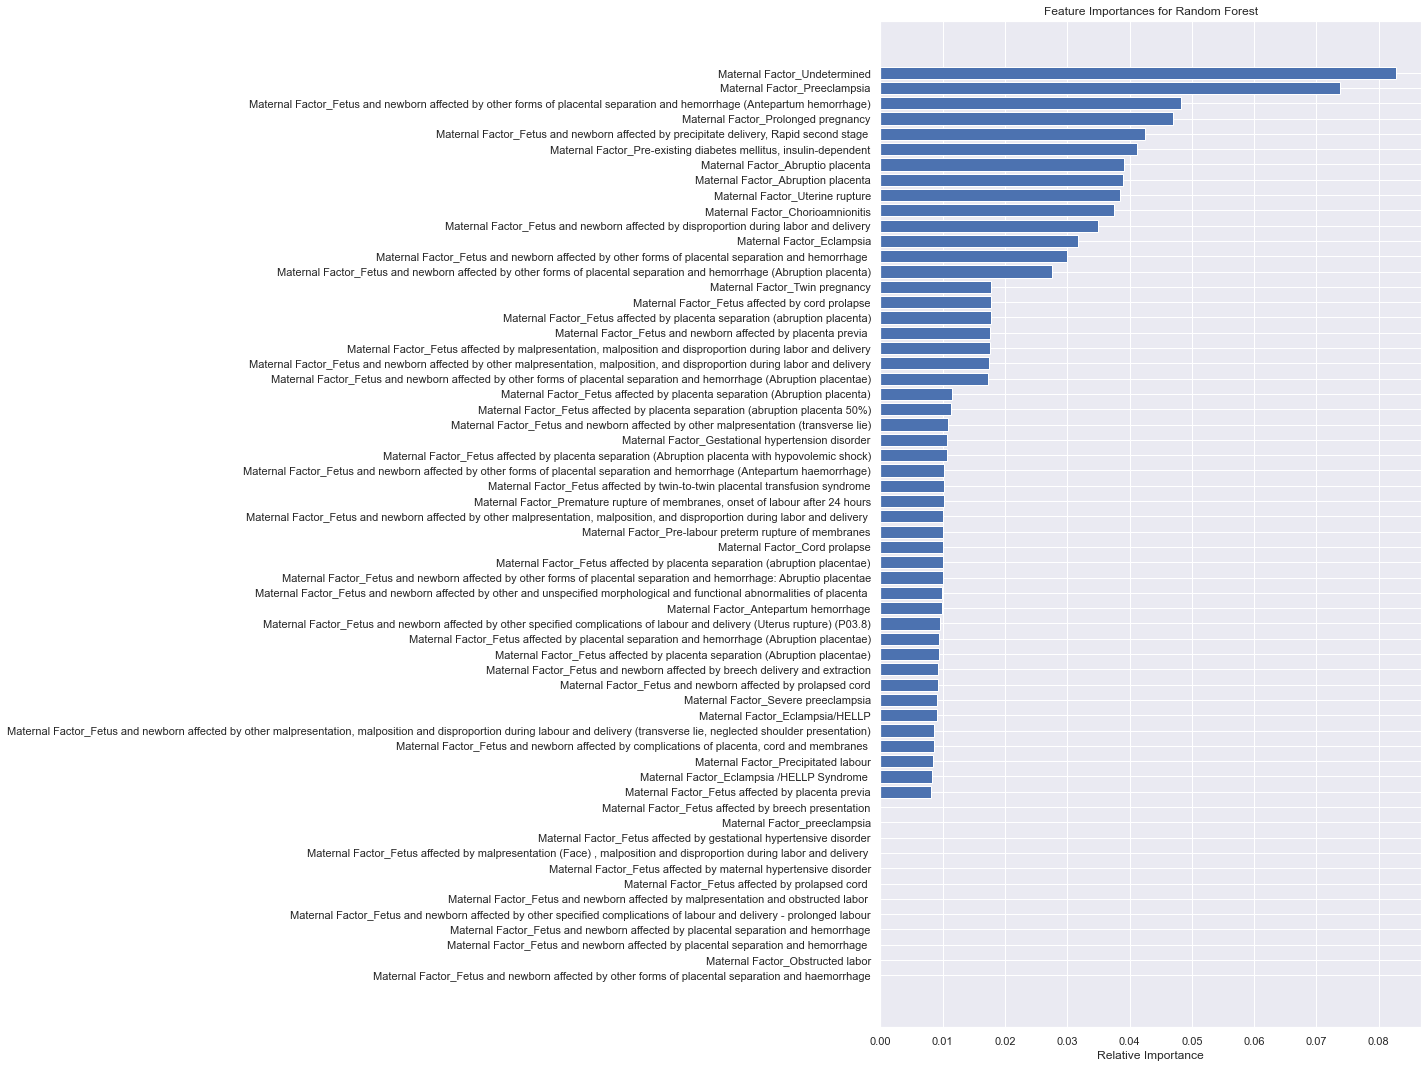

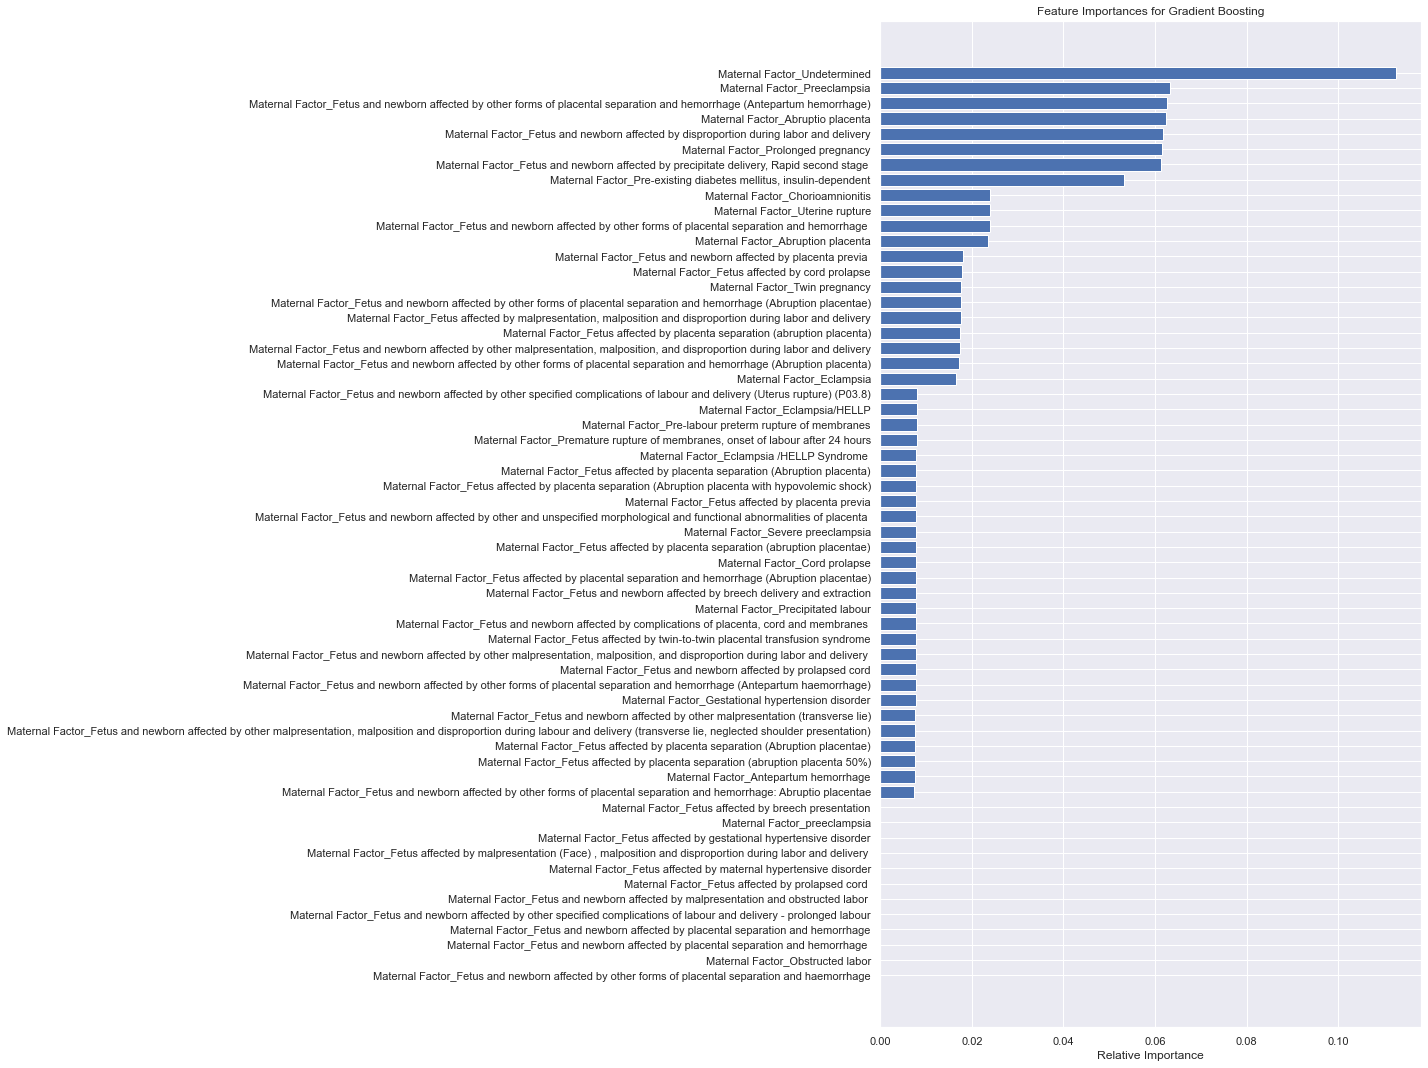

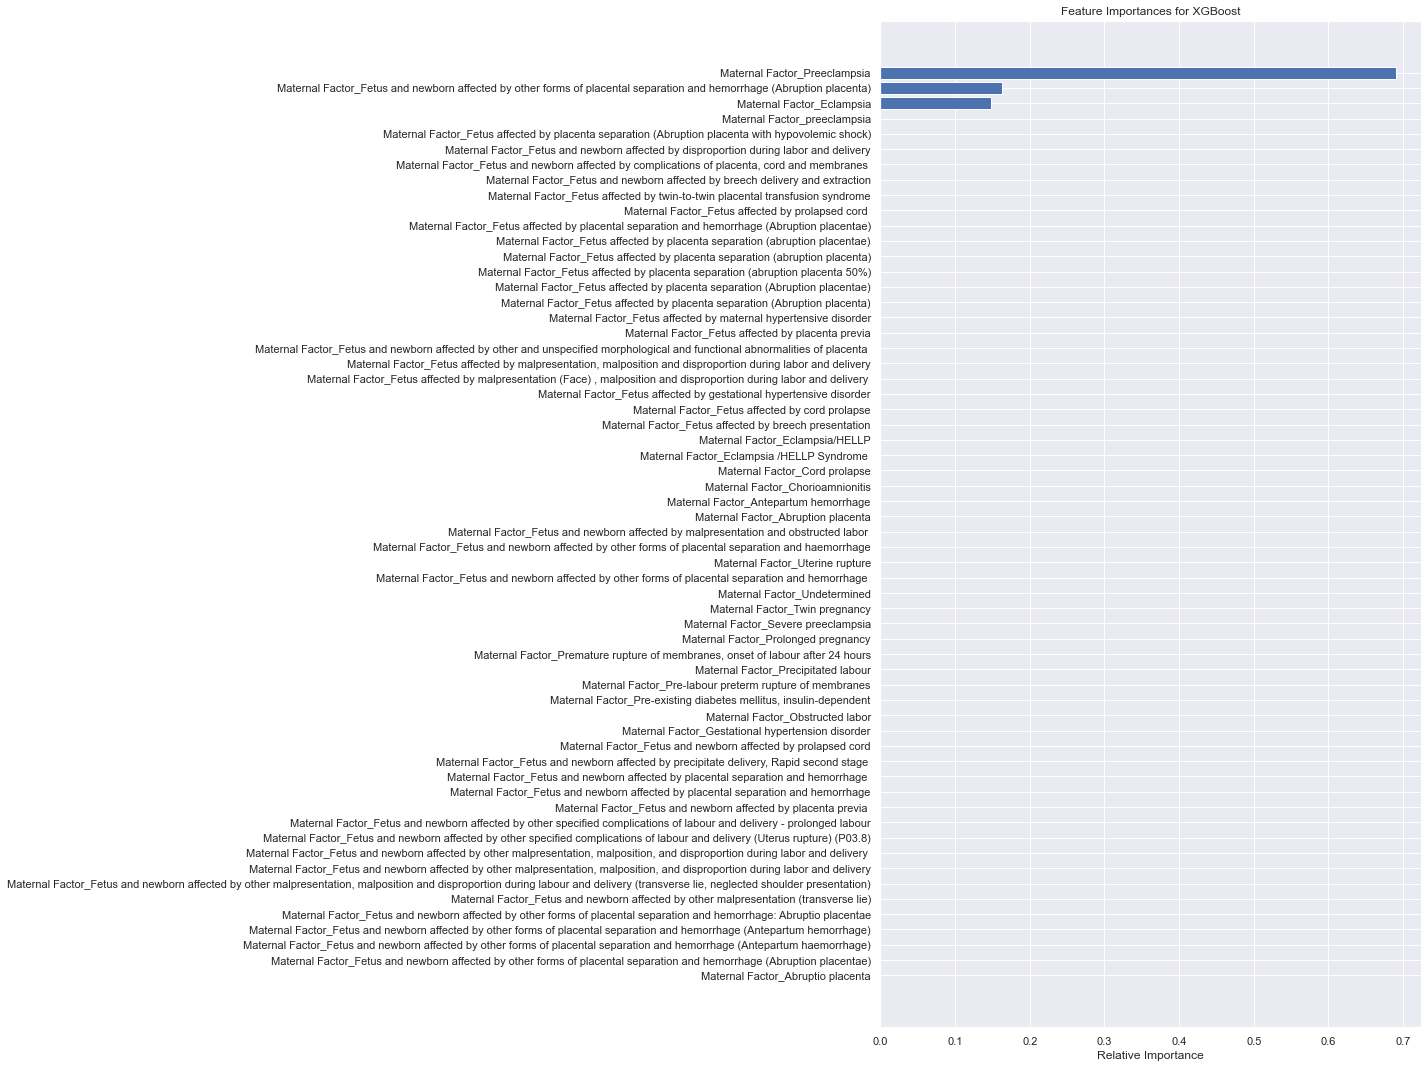

In [69]:
# plot  feature importance 
def plot_feature_importance(importances, model_name, feature_names):
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(20, 15))
    plt.title(f'Feature Importances for {model_name}', fontsize =20, color='blue' )
    plt.barh(range(len(importances)), importances[indices], align='center')
    plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Plot feature importances for each classifier
for name, importances in feature_importances.items():
    plot_feature_importance(importances, name, X.columns)



- Insight about the above visualization are described under sectoin 4(feature engineering)

#### B. Plot the top five infant underlying causes of the child death 

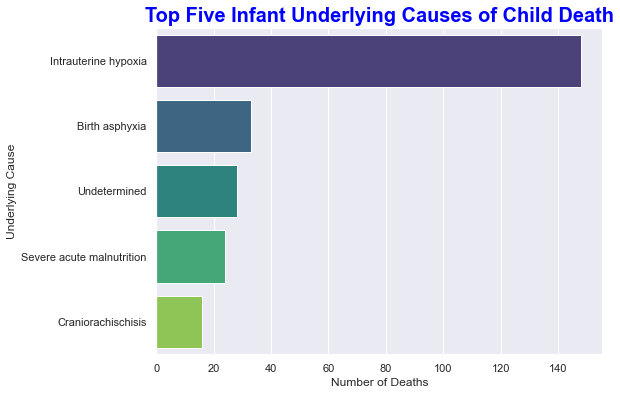

In [70]:
top_infant_causes = df_deco['Underlying Cause'].value_counts().head(5)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_infant_causes.values, y=top_infant_causes.index, palette='viridis')
plt.title('Top Five Infant Underlying Causes of Child Death', fontsize = 20, fontweight = 'bold', color='blue')
plt.xlabel('Number of Deaths')
plt.ylabel('Underlying Cause')
plt.show()


****Insight from the above****
- Intrauterine hypoxia, is the most and far highest underlying cause for infant death.
- Birth asphyxia is the second most underlying cause the for the infant death.
- Undetermined is third underlying cuses which is ranked thirdly accordingto the given dataset.

#### C. Plot the top five maternal factors contributing to the child death

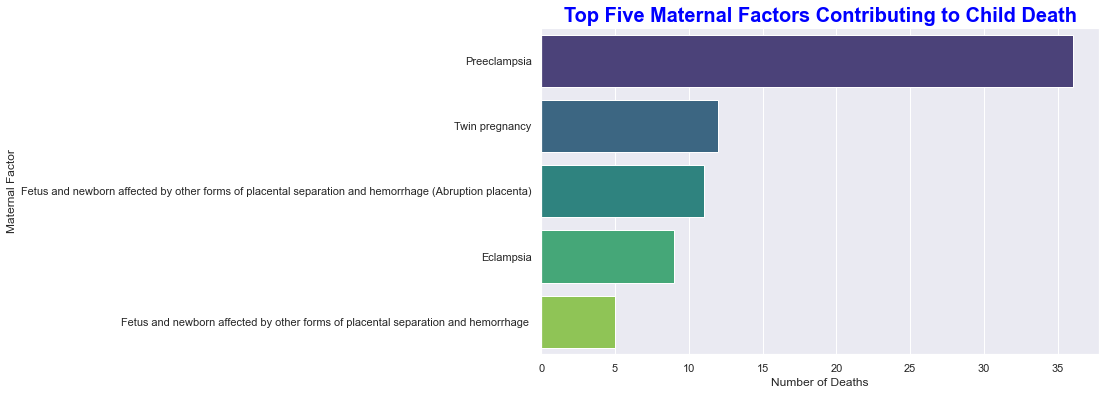

In [71]:
# Top 5 maternal factor contributing to child death
top_maternal_factors = df_deco['Maternal Factor'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_maternal_factors.values, y=top_maternal_factors.index, palette='viridis')
plt.title('Top Five Maternal Factors Contributing to Child Death', fontsize = 20, fontweight = 'bold', color='blue')
plt.xlabel('Number of Deaths')
plt.ylabel('Maternal Factor')
plt.show()


*****Insight from the above | Maternal Factor*****
- The above descriptive summary and the bar graph shows clear and precise information about the contribution of Maternal Factor to infant death . Accordingly here is few summary given below to make it understandable.
> - `Preeclampsia`, is the most and far highest maternal factor for infant death and it covers 18% of the total deaths contribution.
> - `Twin pregnancy` is the second most maternal factor the for the infant death and it covers 6% of the total deaths.
> - `Fetus and newborn affected by other forms` contributes 5% of the infant death which is ranked thirdly accordingto the given dataset.
> - Next, `Eclampsia` is the maternal factor for the infant death which contributes around 4%. 
- In summary considering the magnitude and proportion of the Maternal Factor contribution to infant death, it requiers a spect special attention to reduce the infant death contributed by `Preeclampsia`.

#### D. Plot the child death based on the case types 

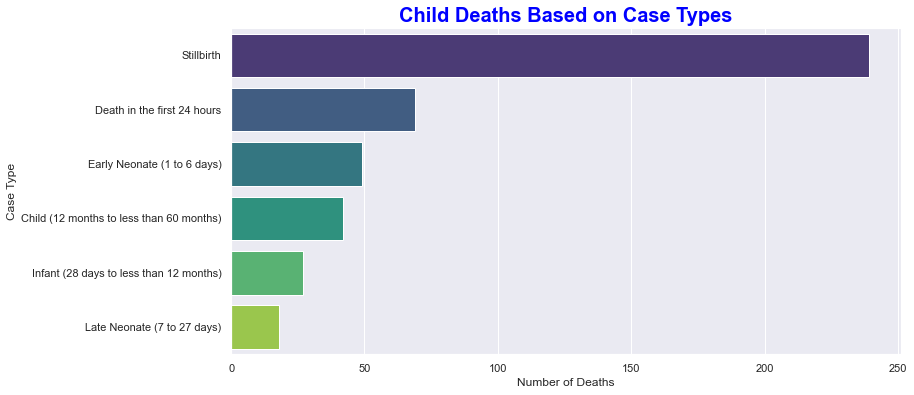

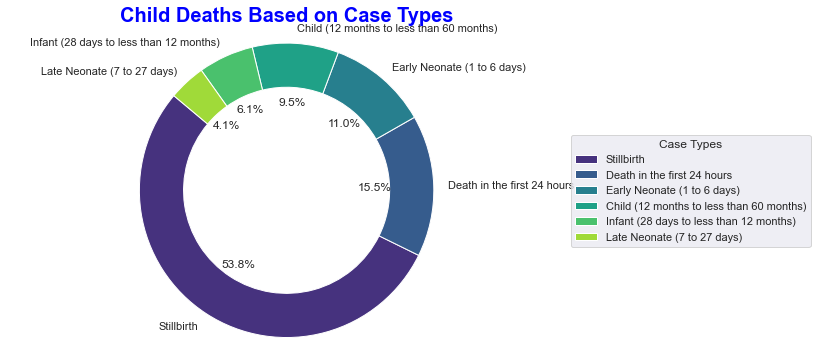

In [72]:
# based on case types
case_type_counts = df_deco['Case Type'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=case_type_counts.values, y=case_type_counts.index, palette='viridis')
plt.title('Child Deaths Based on Case Types', fontsize = 20, fontweight = 'bold', color='blue')
plt.xlabel('Number of Deaths')
plt.ylabel('Case Type')
plt.show()

## using pie chart 
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    case_type_counts, labels=case_type_counts.index, autopct='%1.1f%%',
    startangle=140, colors=sns.color_palette('viridis', len(case_type_counts)),
    wedgeprops=dict(width=0.3)
)
plt.title('Child Deaths Based on Case Types', fontsize = 20, fontweight = 'bold', color='blue')
plt.legend(wedges, case_type_counts.index, title="Case Types", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


*****Insight from the above | Case Type*****
- The above descriptive summary and the pie chart shows clear and precise information about the case type in relation to infant death . Accordingly, here is few summary given below to make it ease.
> - `Stillbirth`, is the first most highest case type in infant death and it accounts 53% of the total deaths cases.
> - `Death in the first 24 hours` is the second most case type in the infant death and it accounts 15% of the total deaths cases.
> - `Early Neonate (1 to 6 days)` accounts 11% in the infant death which is ranked thirdly accordingto the given dataset.
> - Next, `Child (12 months to less than 60 months)` accounts 9% in the infant death. 
- In summary considering the magnitude and proportion of the case type in relation to infant death, it requiers a specila research and study to mitigate the problem behind the case type `Stillbirth`.